/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_31886/2435142039.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_31886/2435142039.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_31886/2435142039.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_31886/2435142039.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


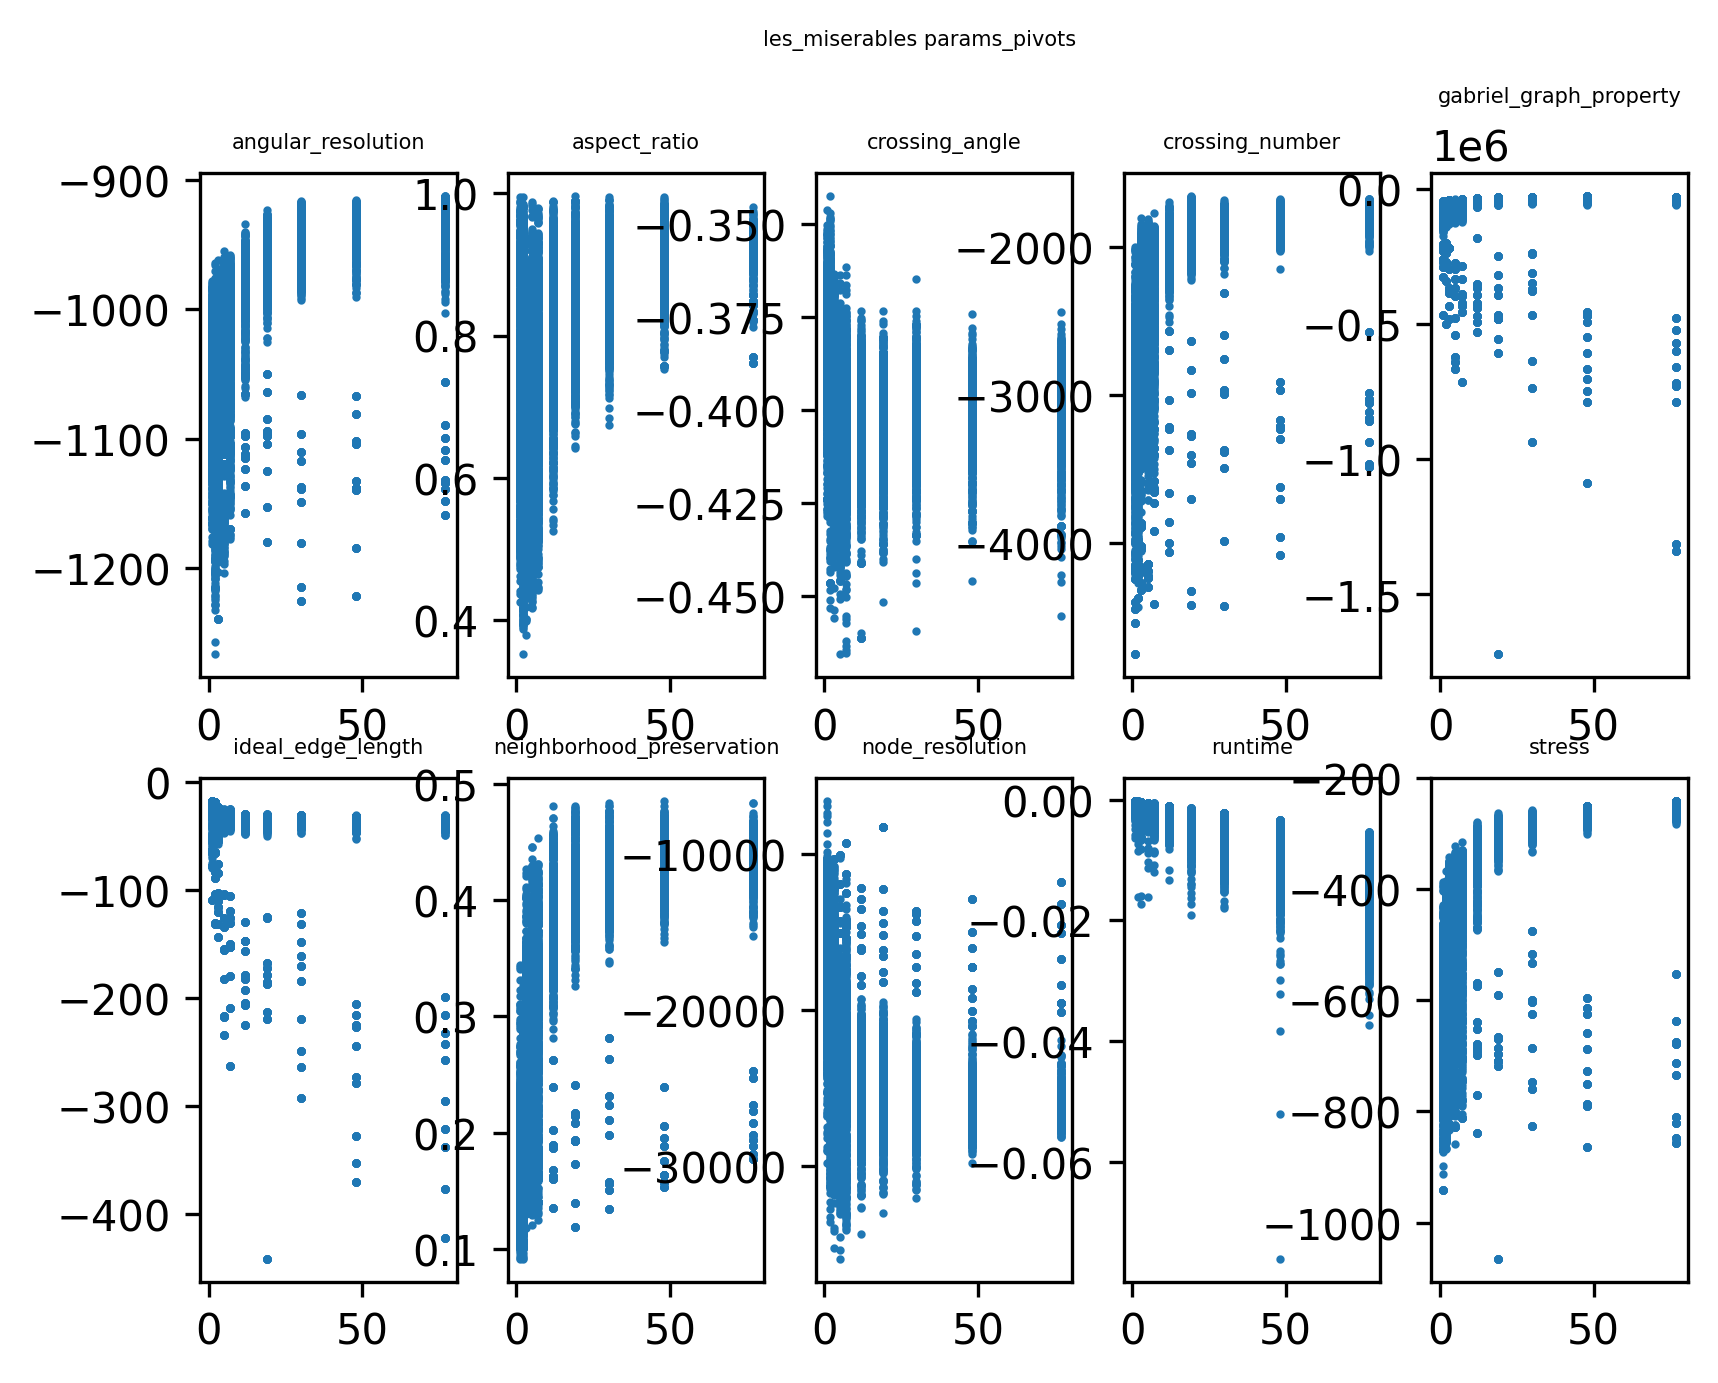

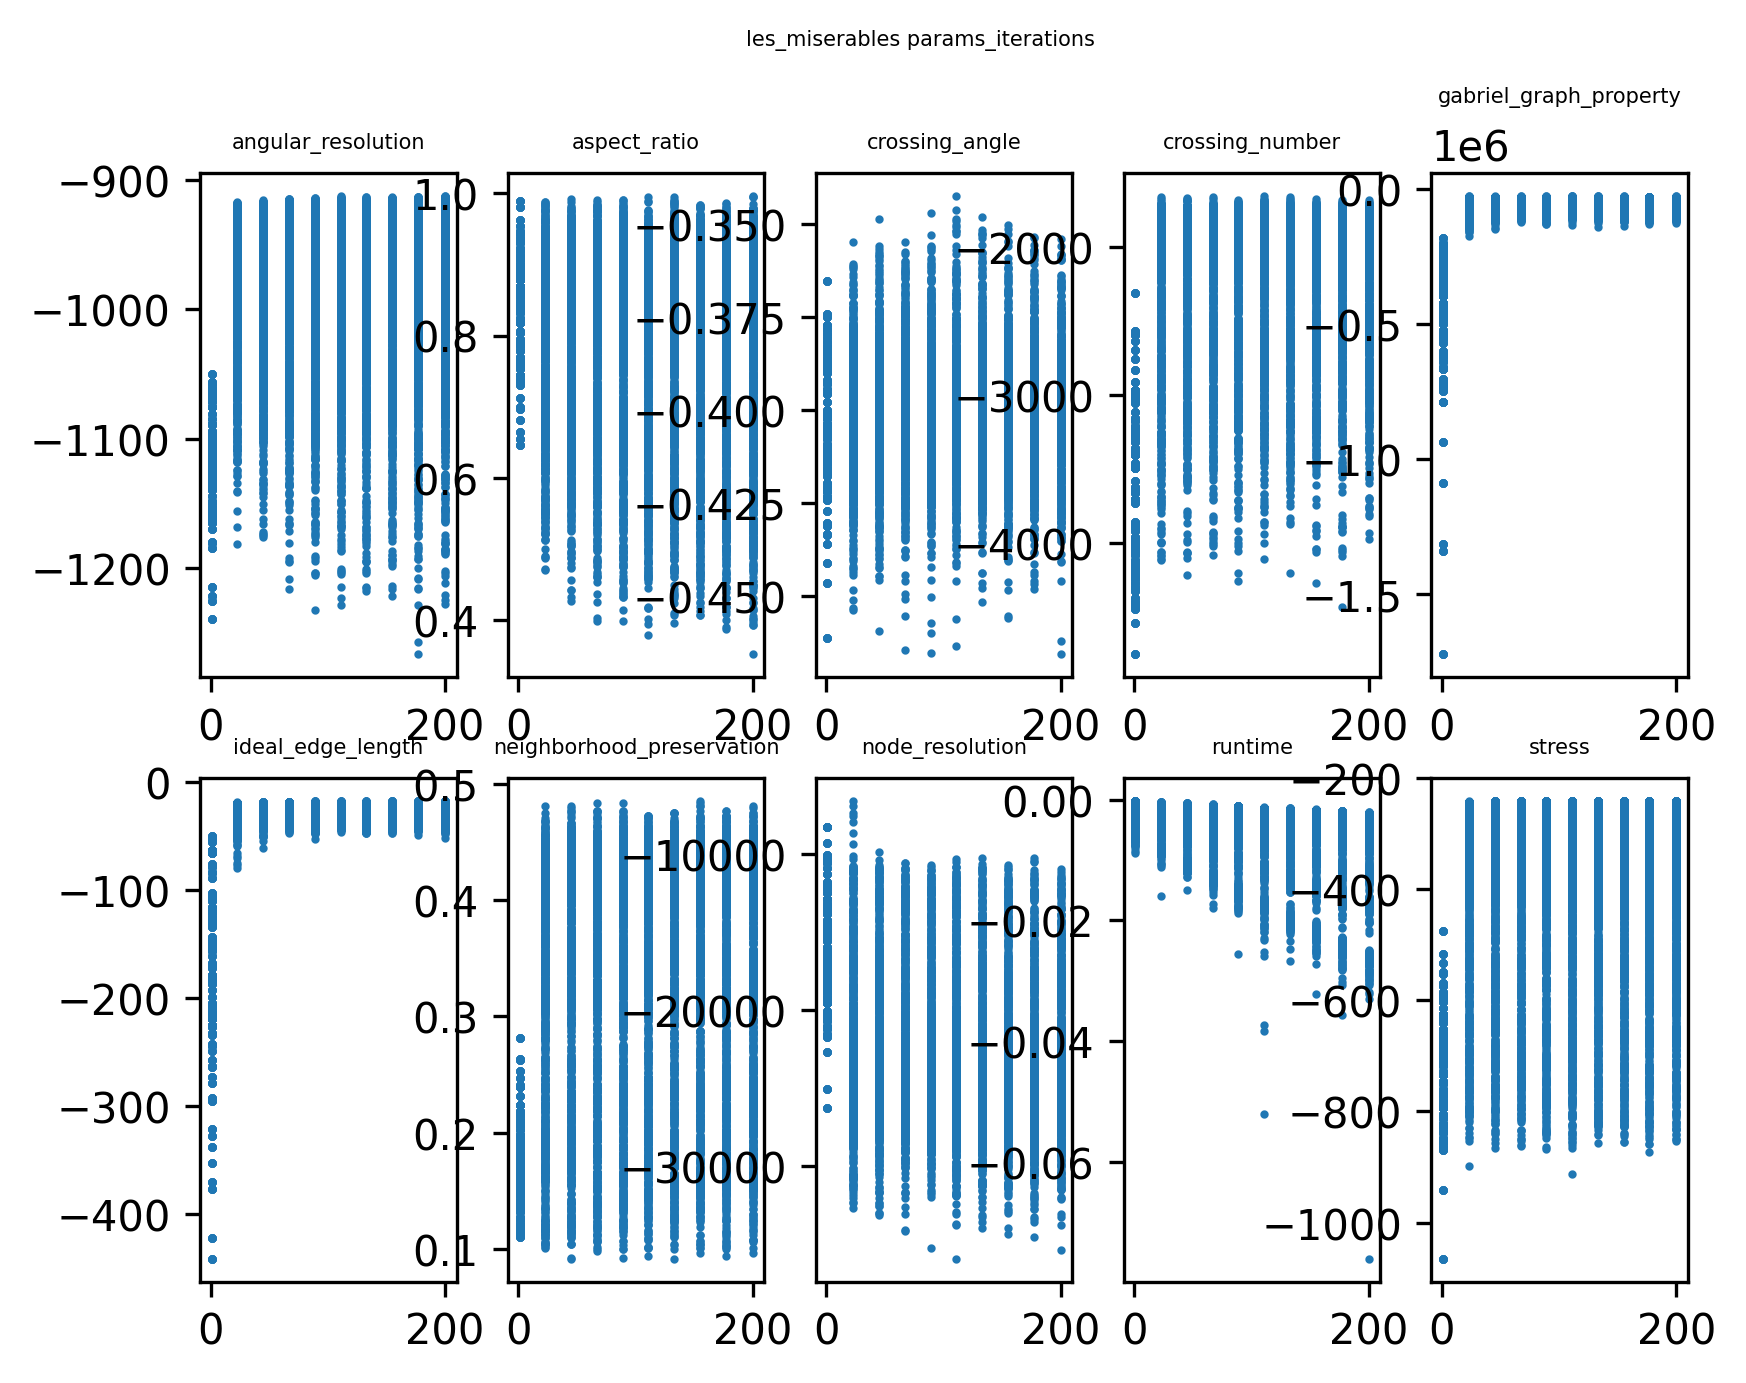

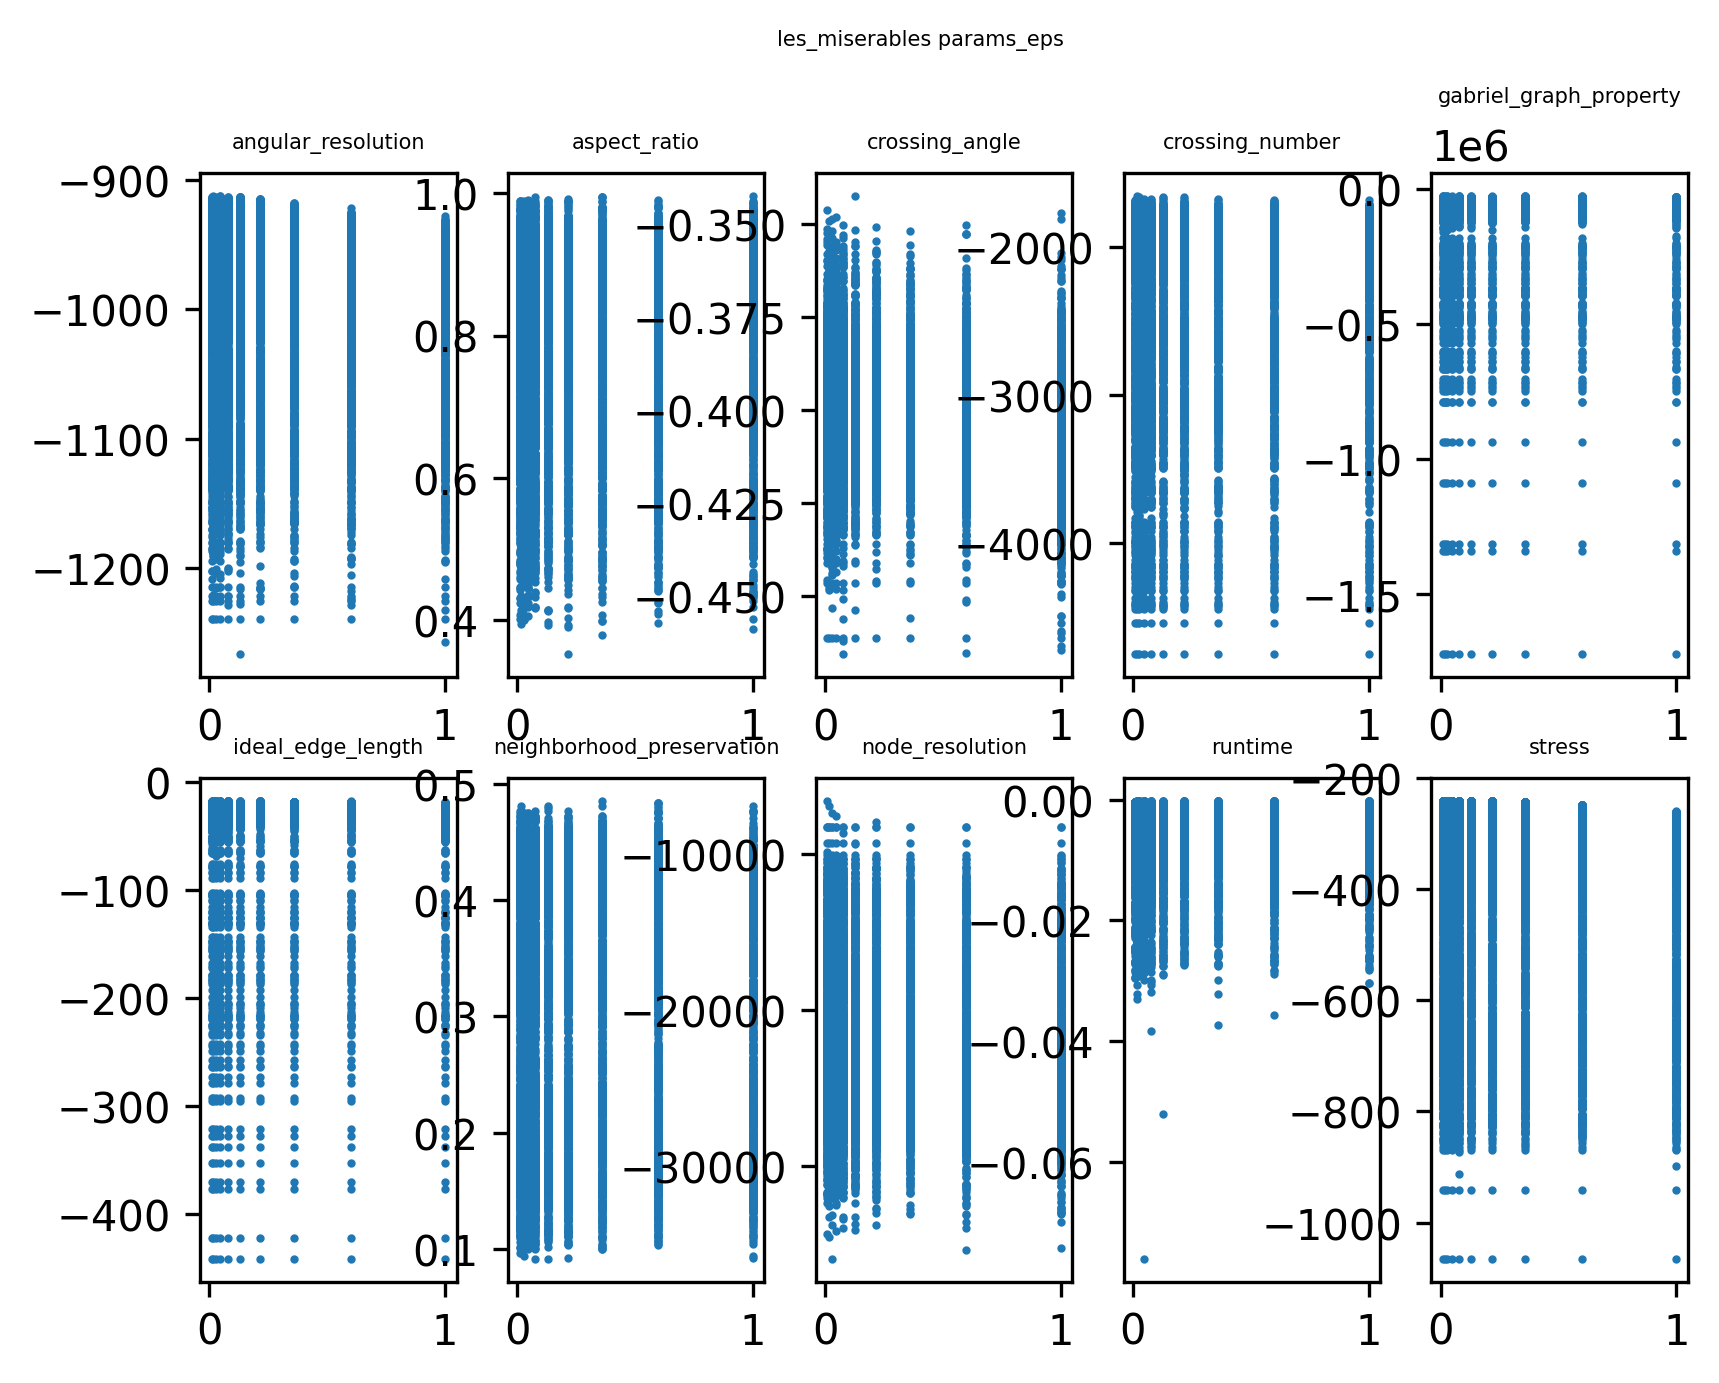

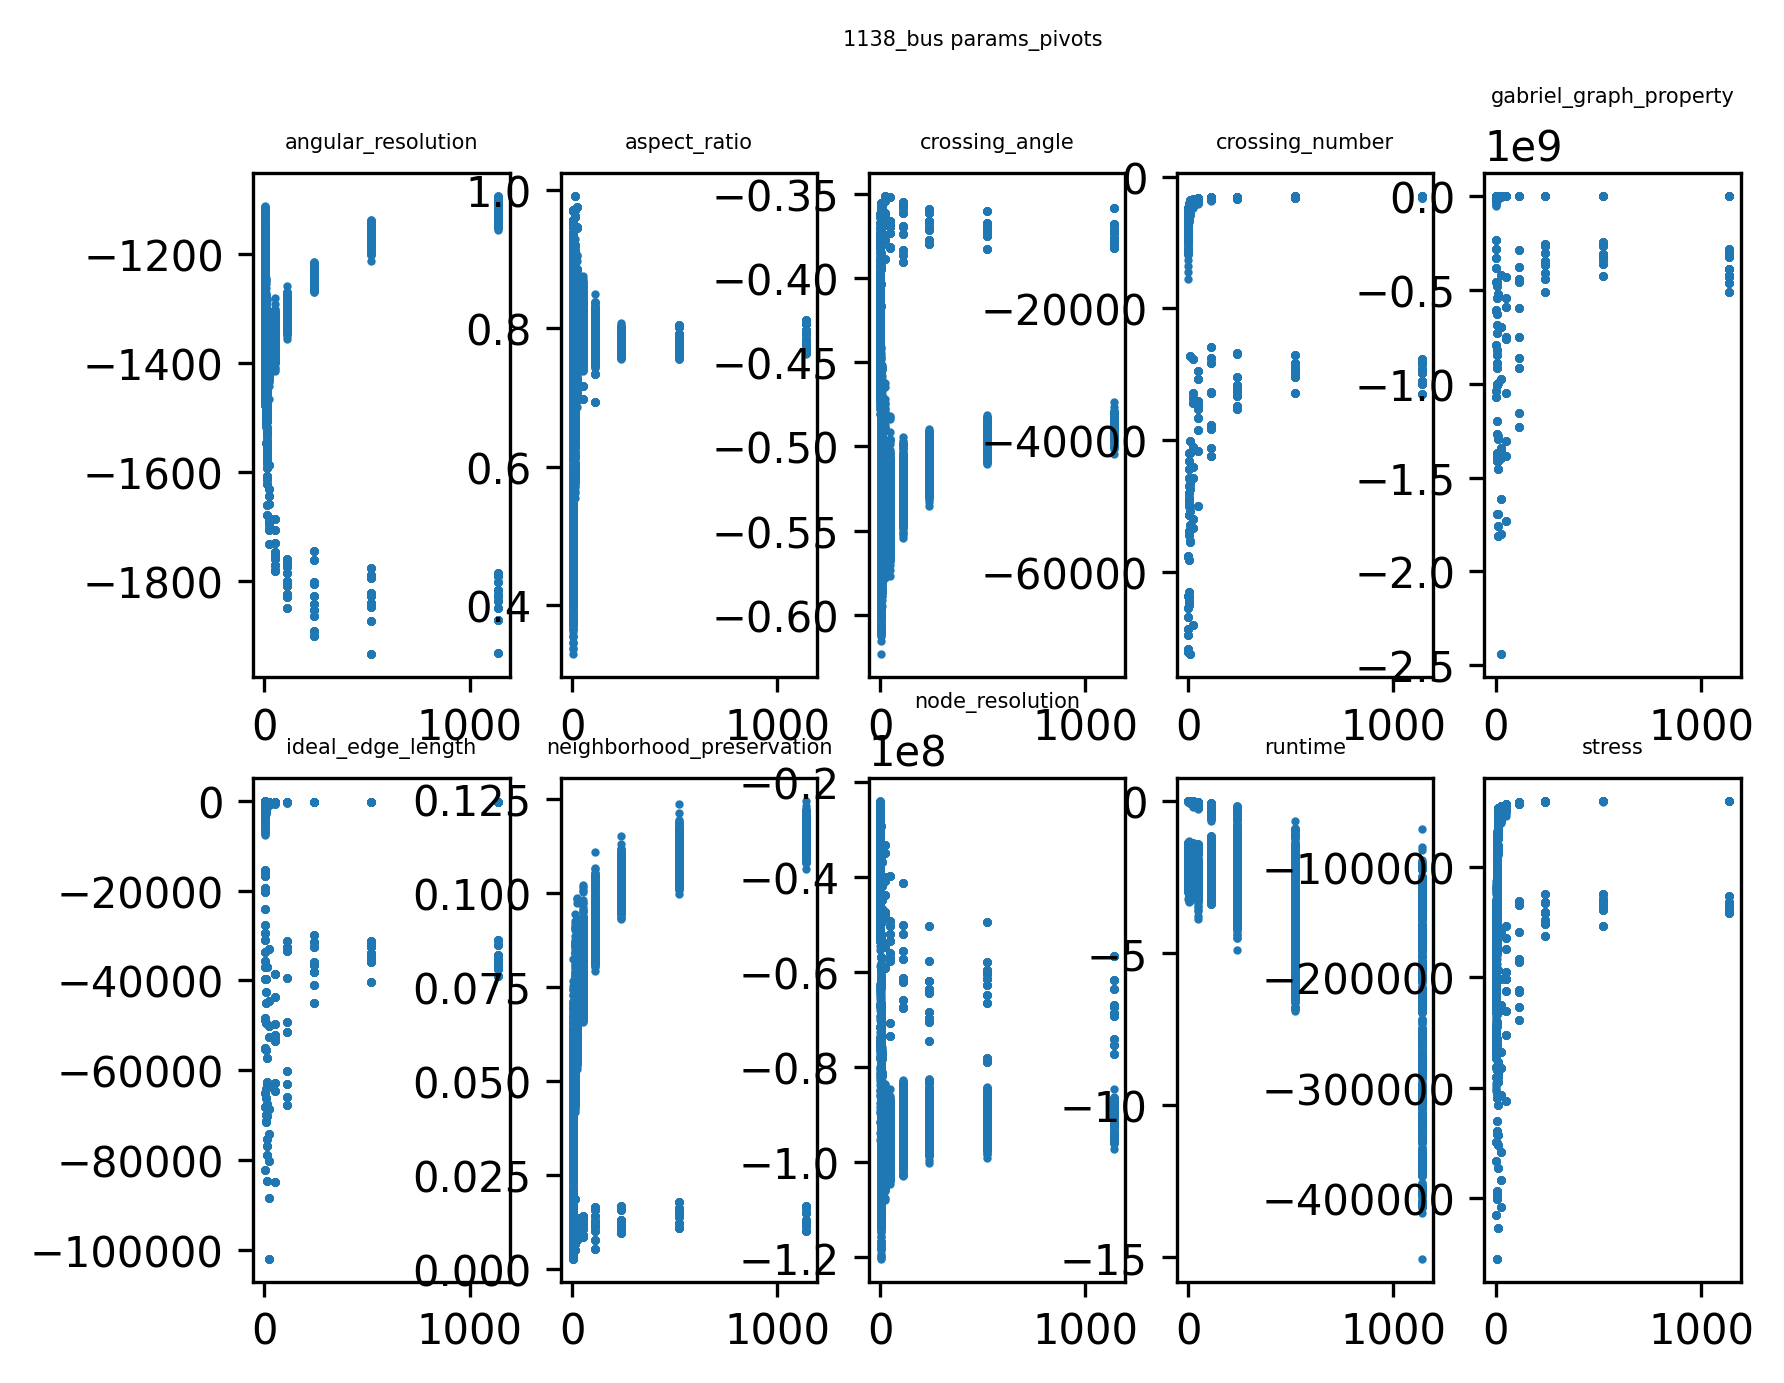

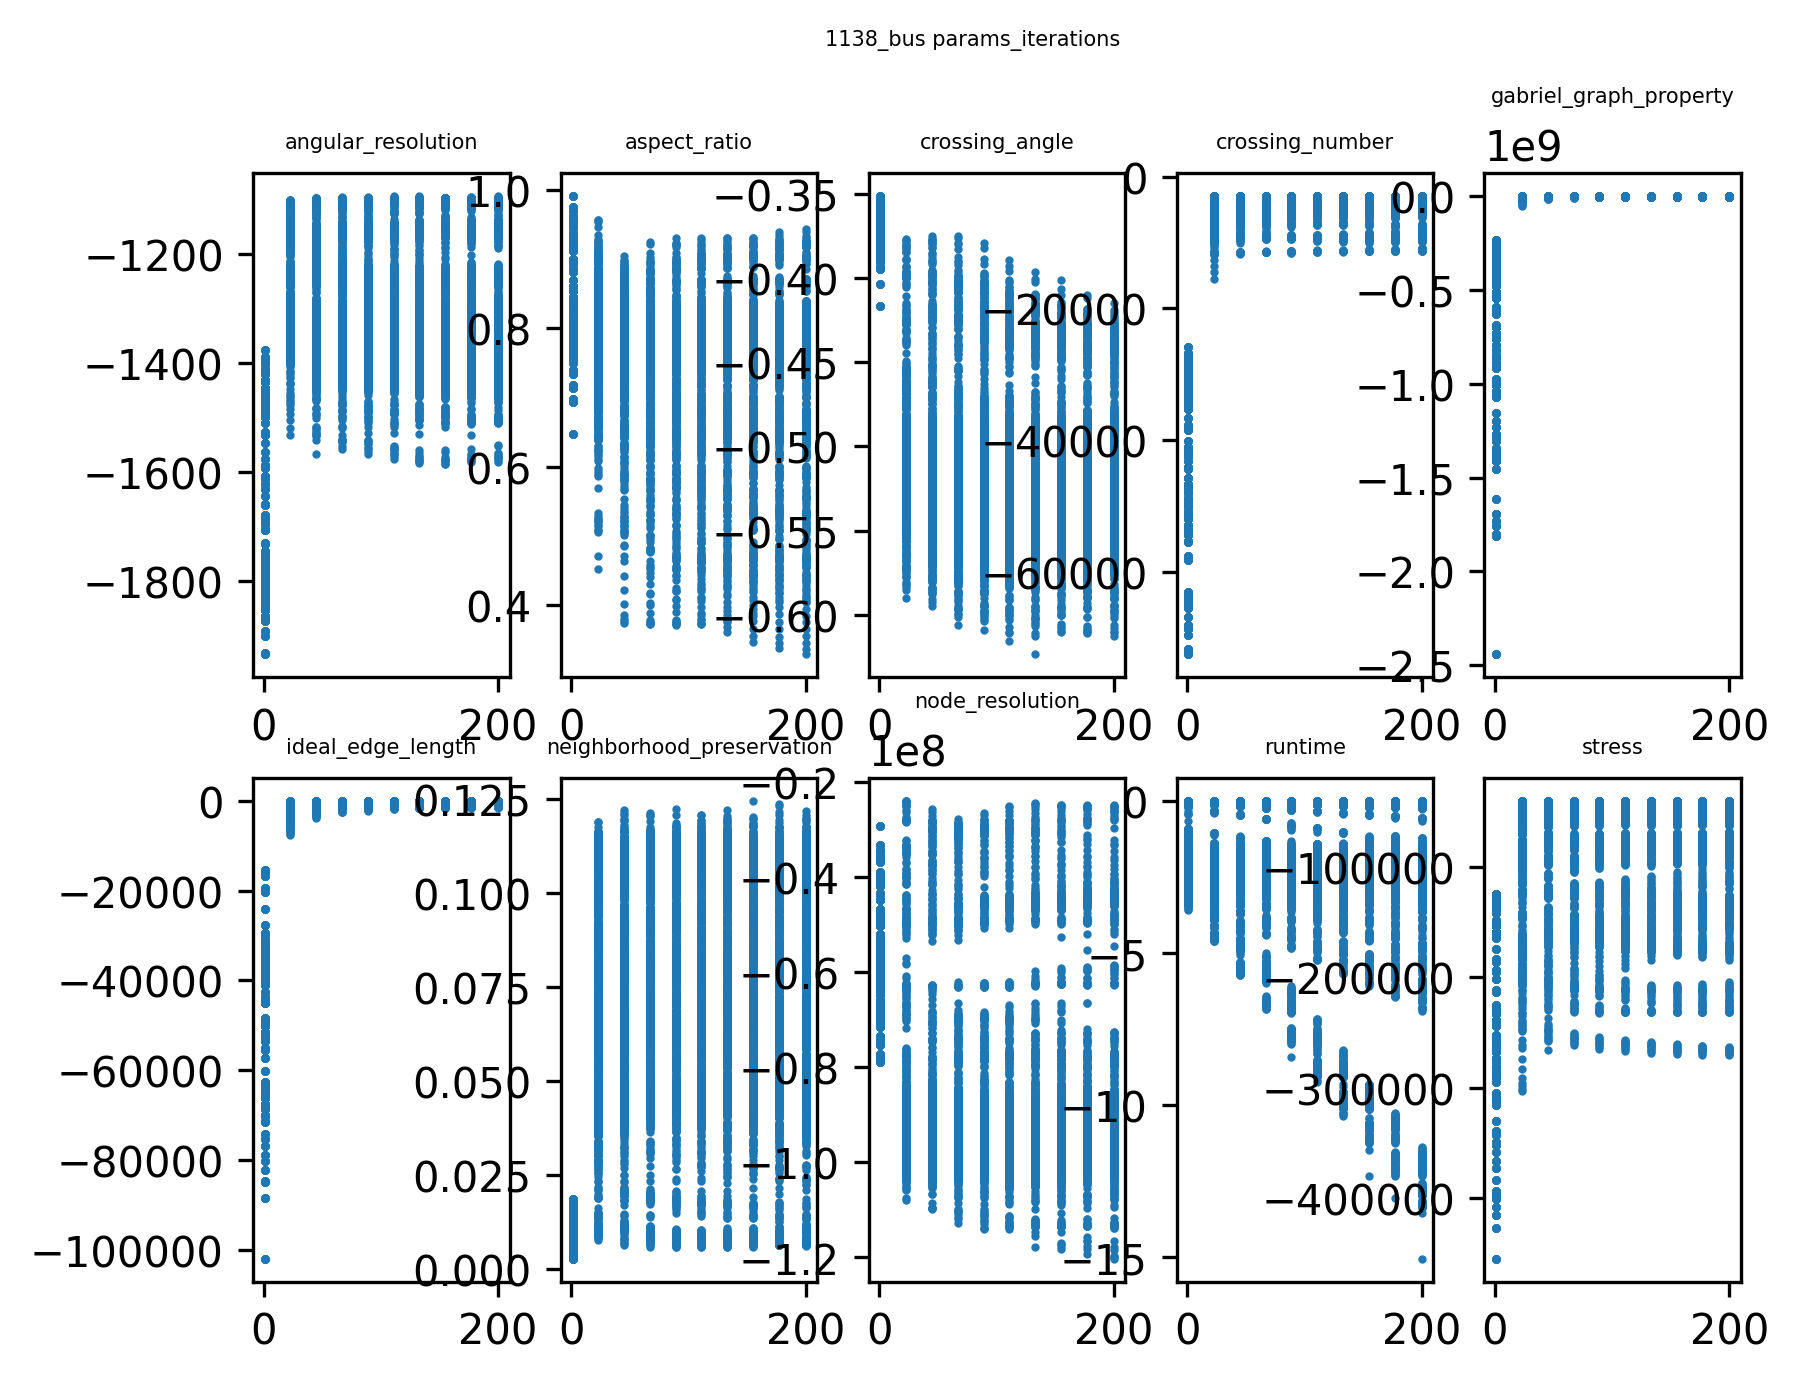

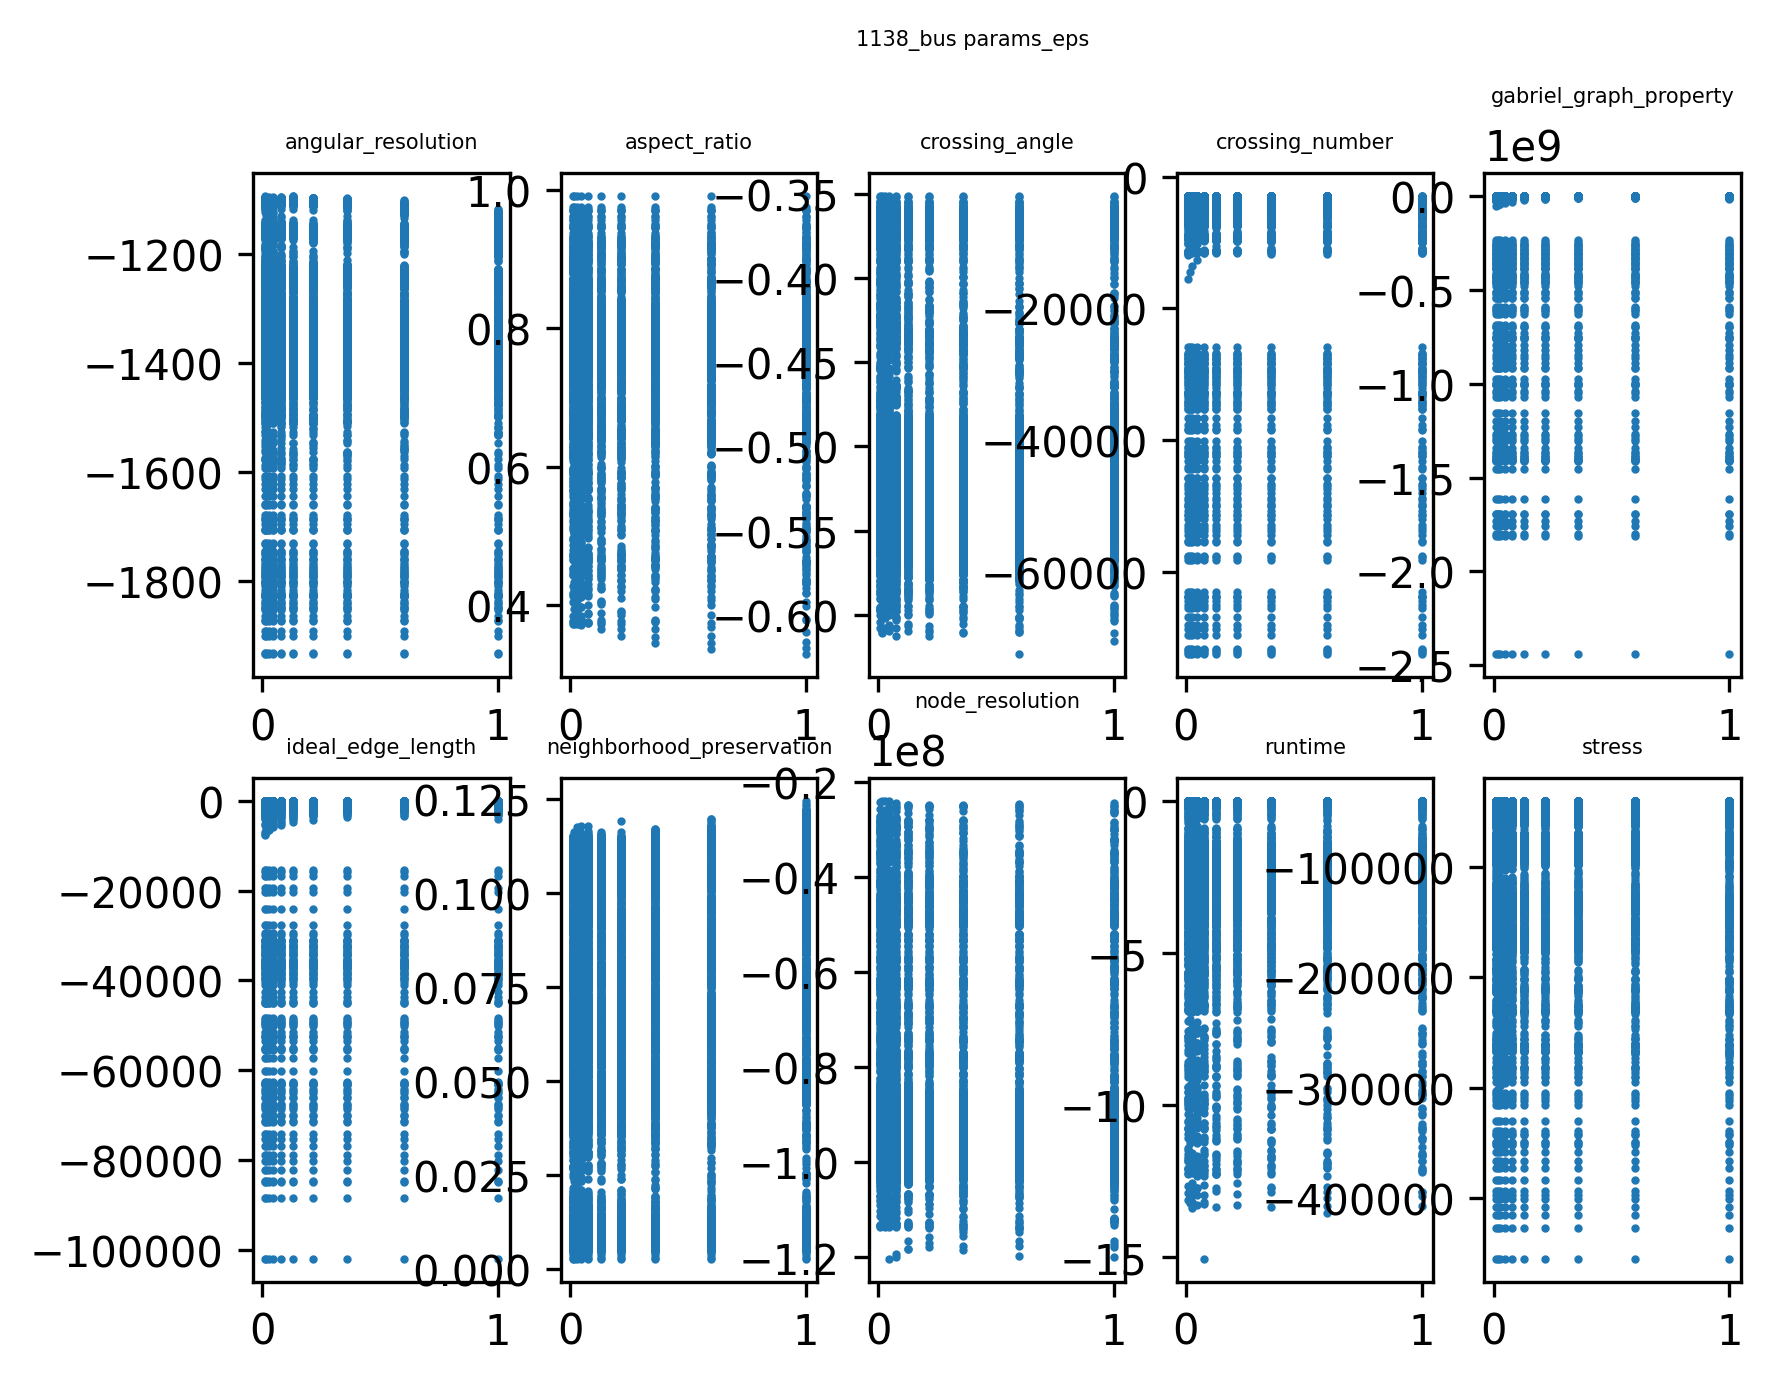

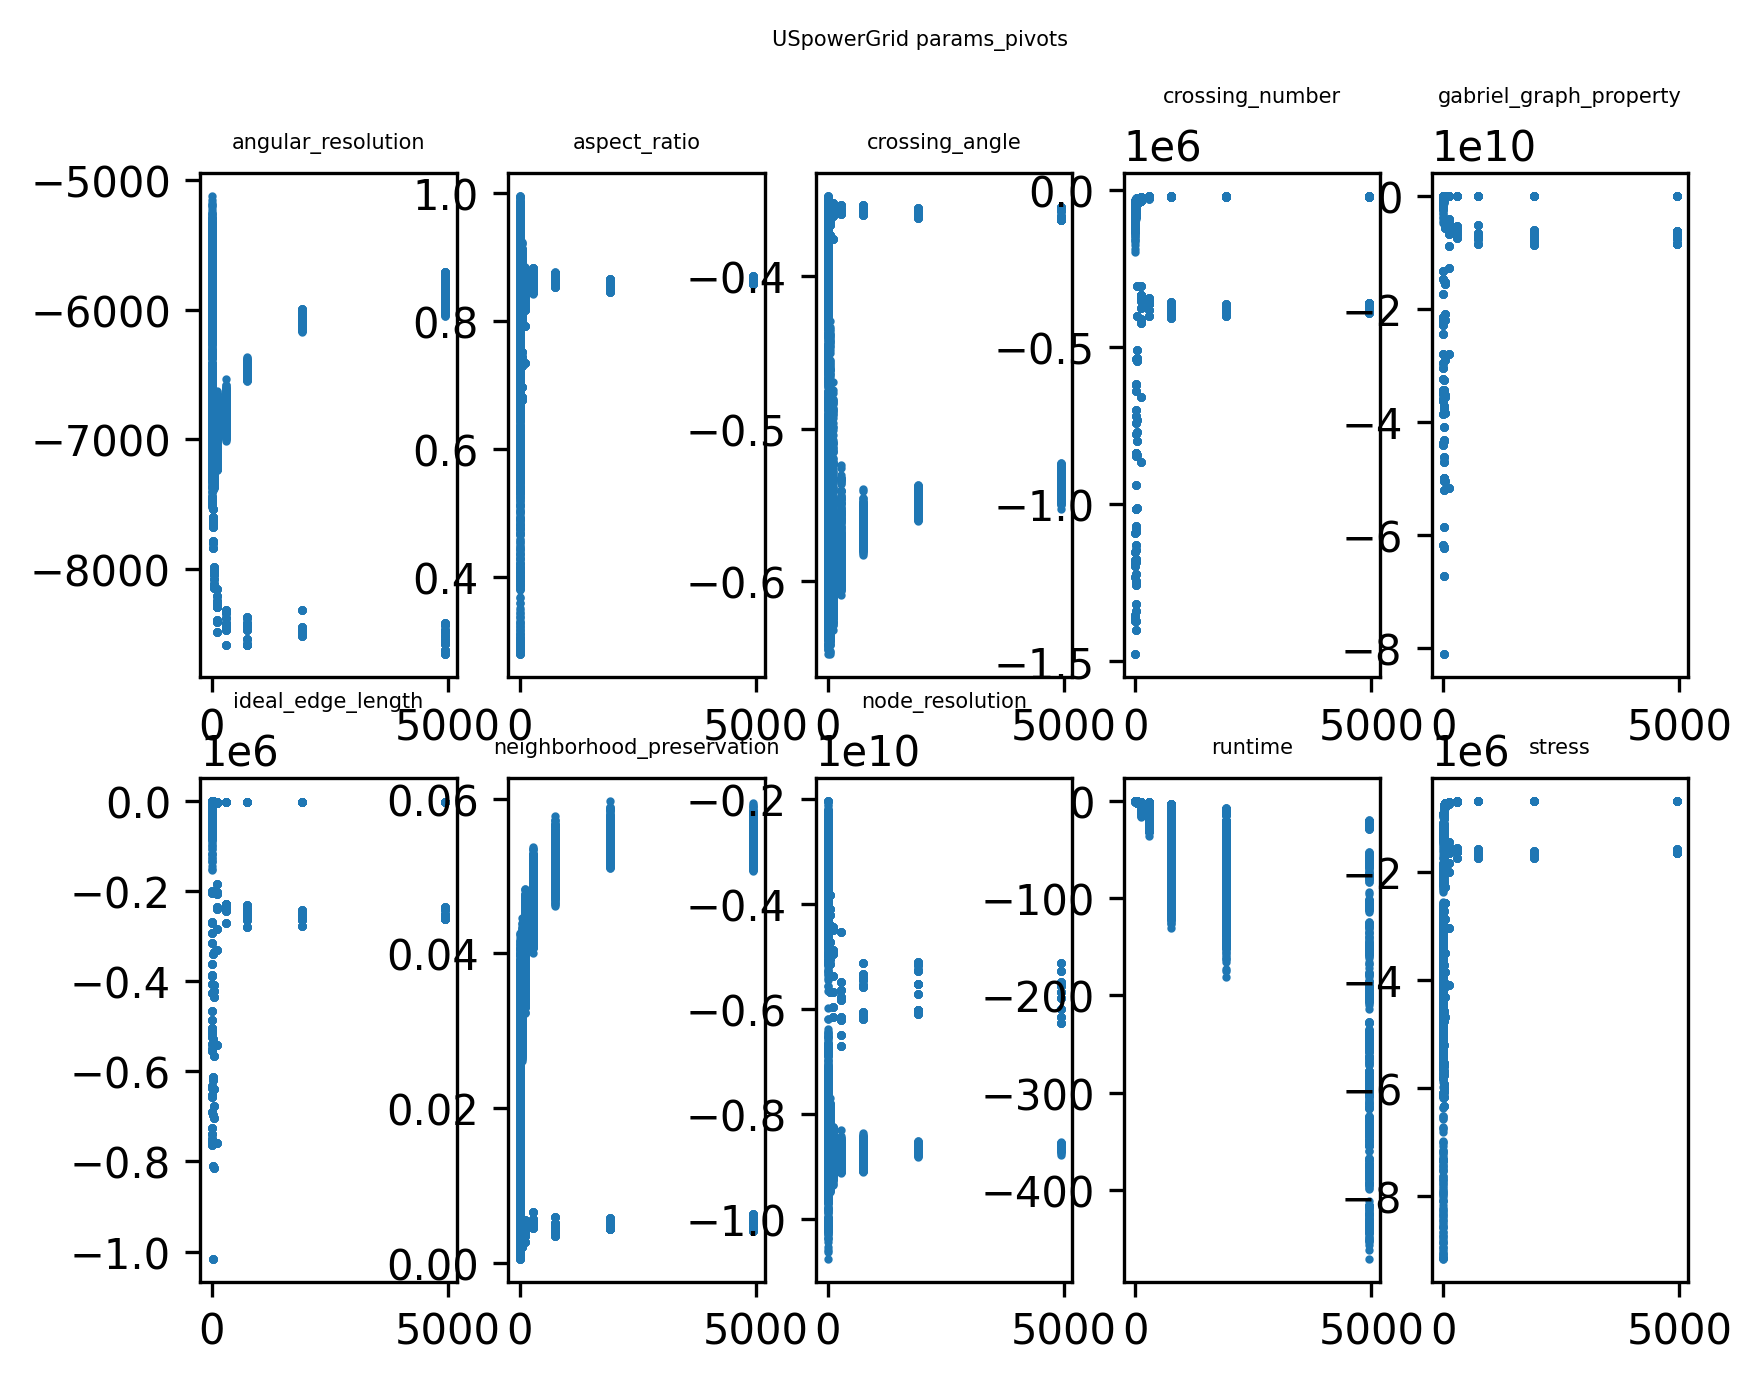

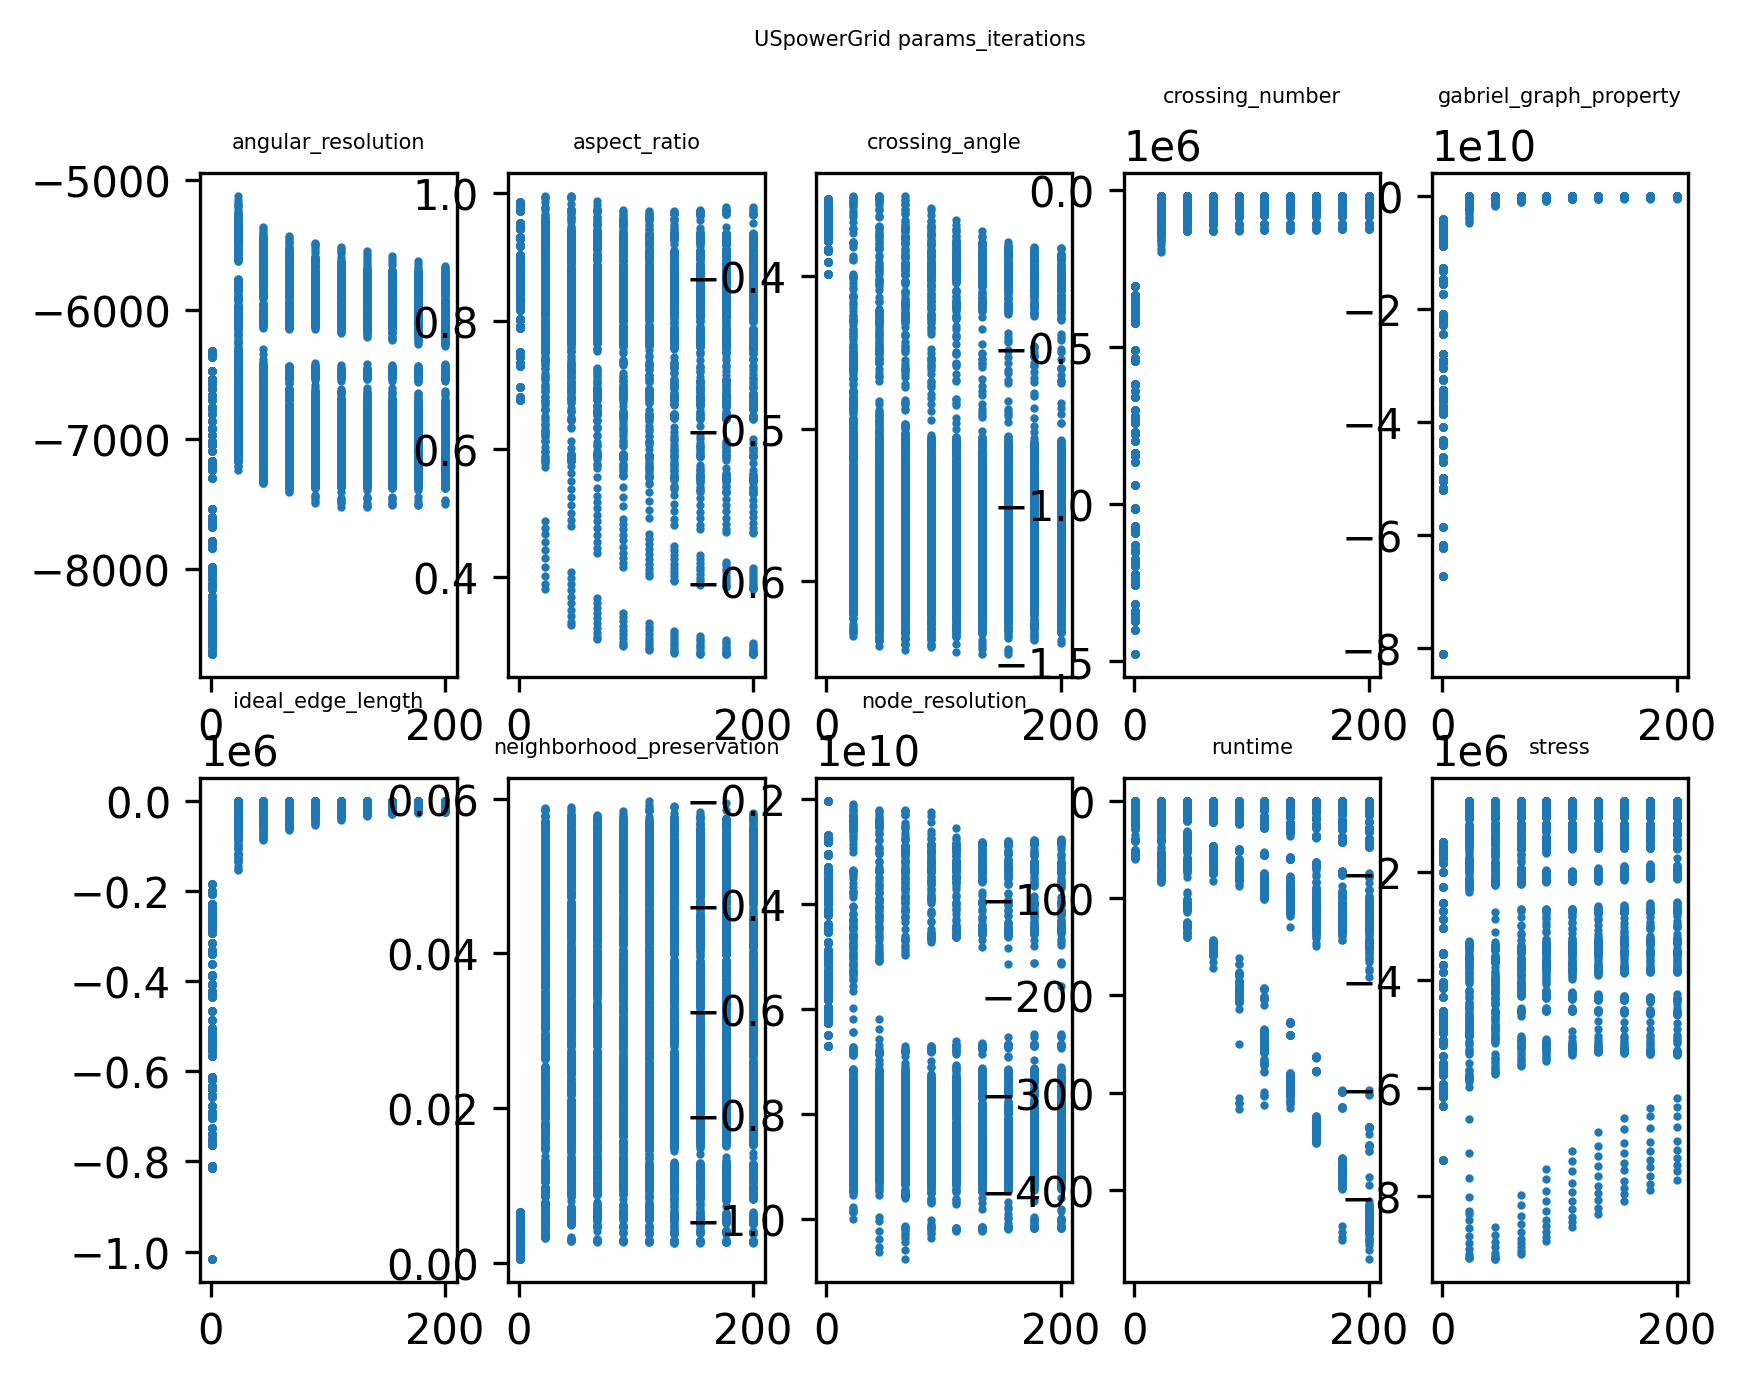

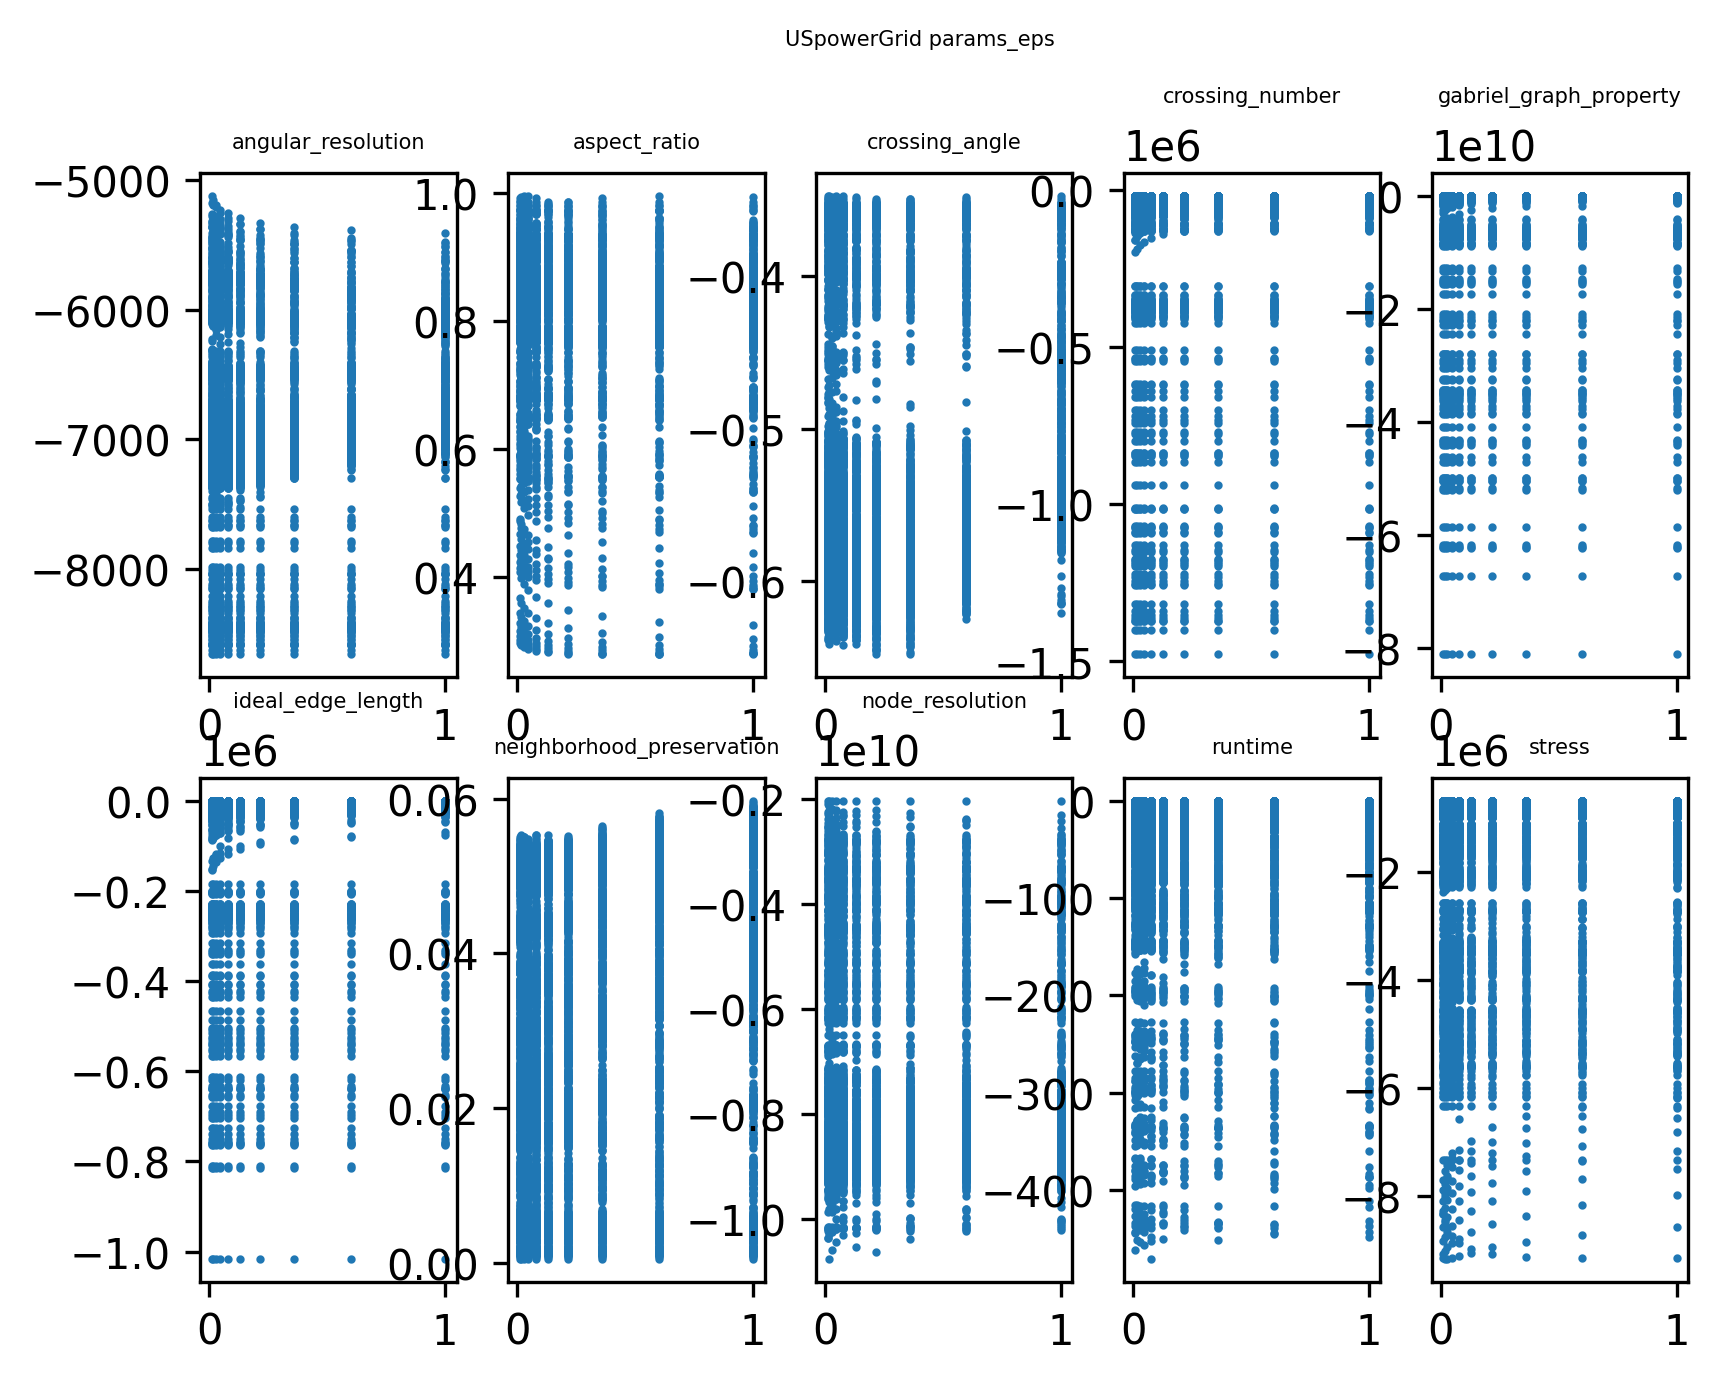

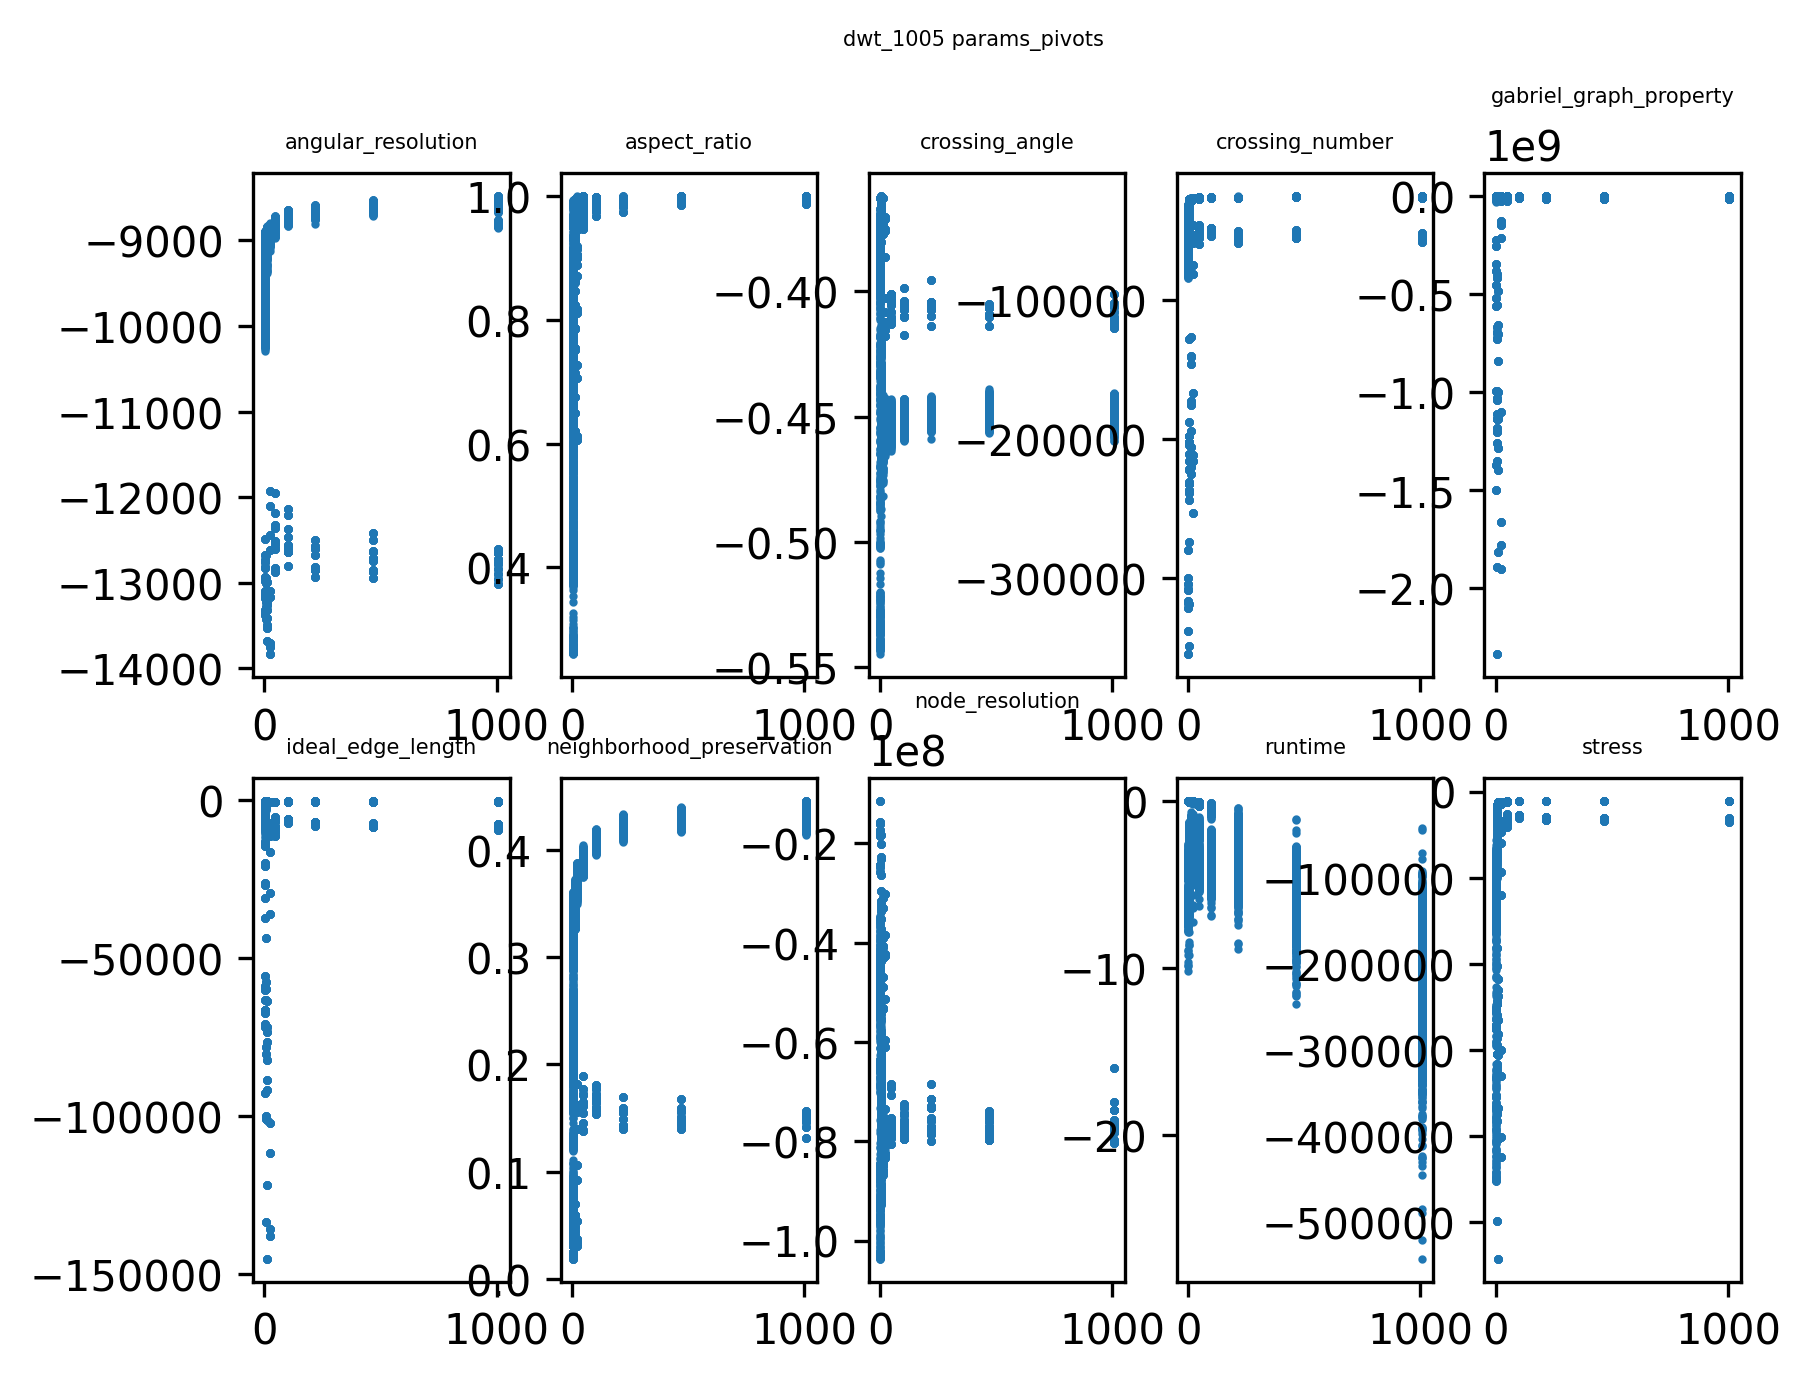

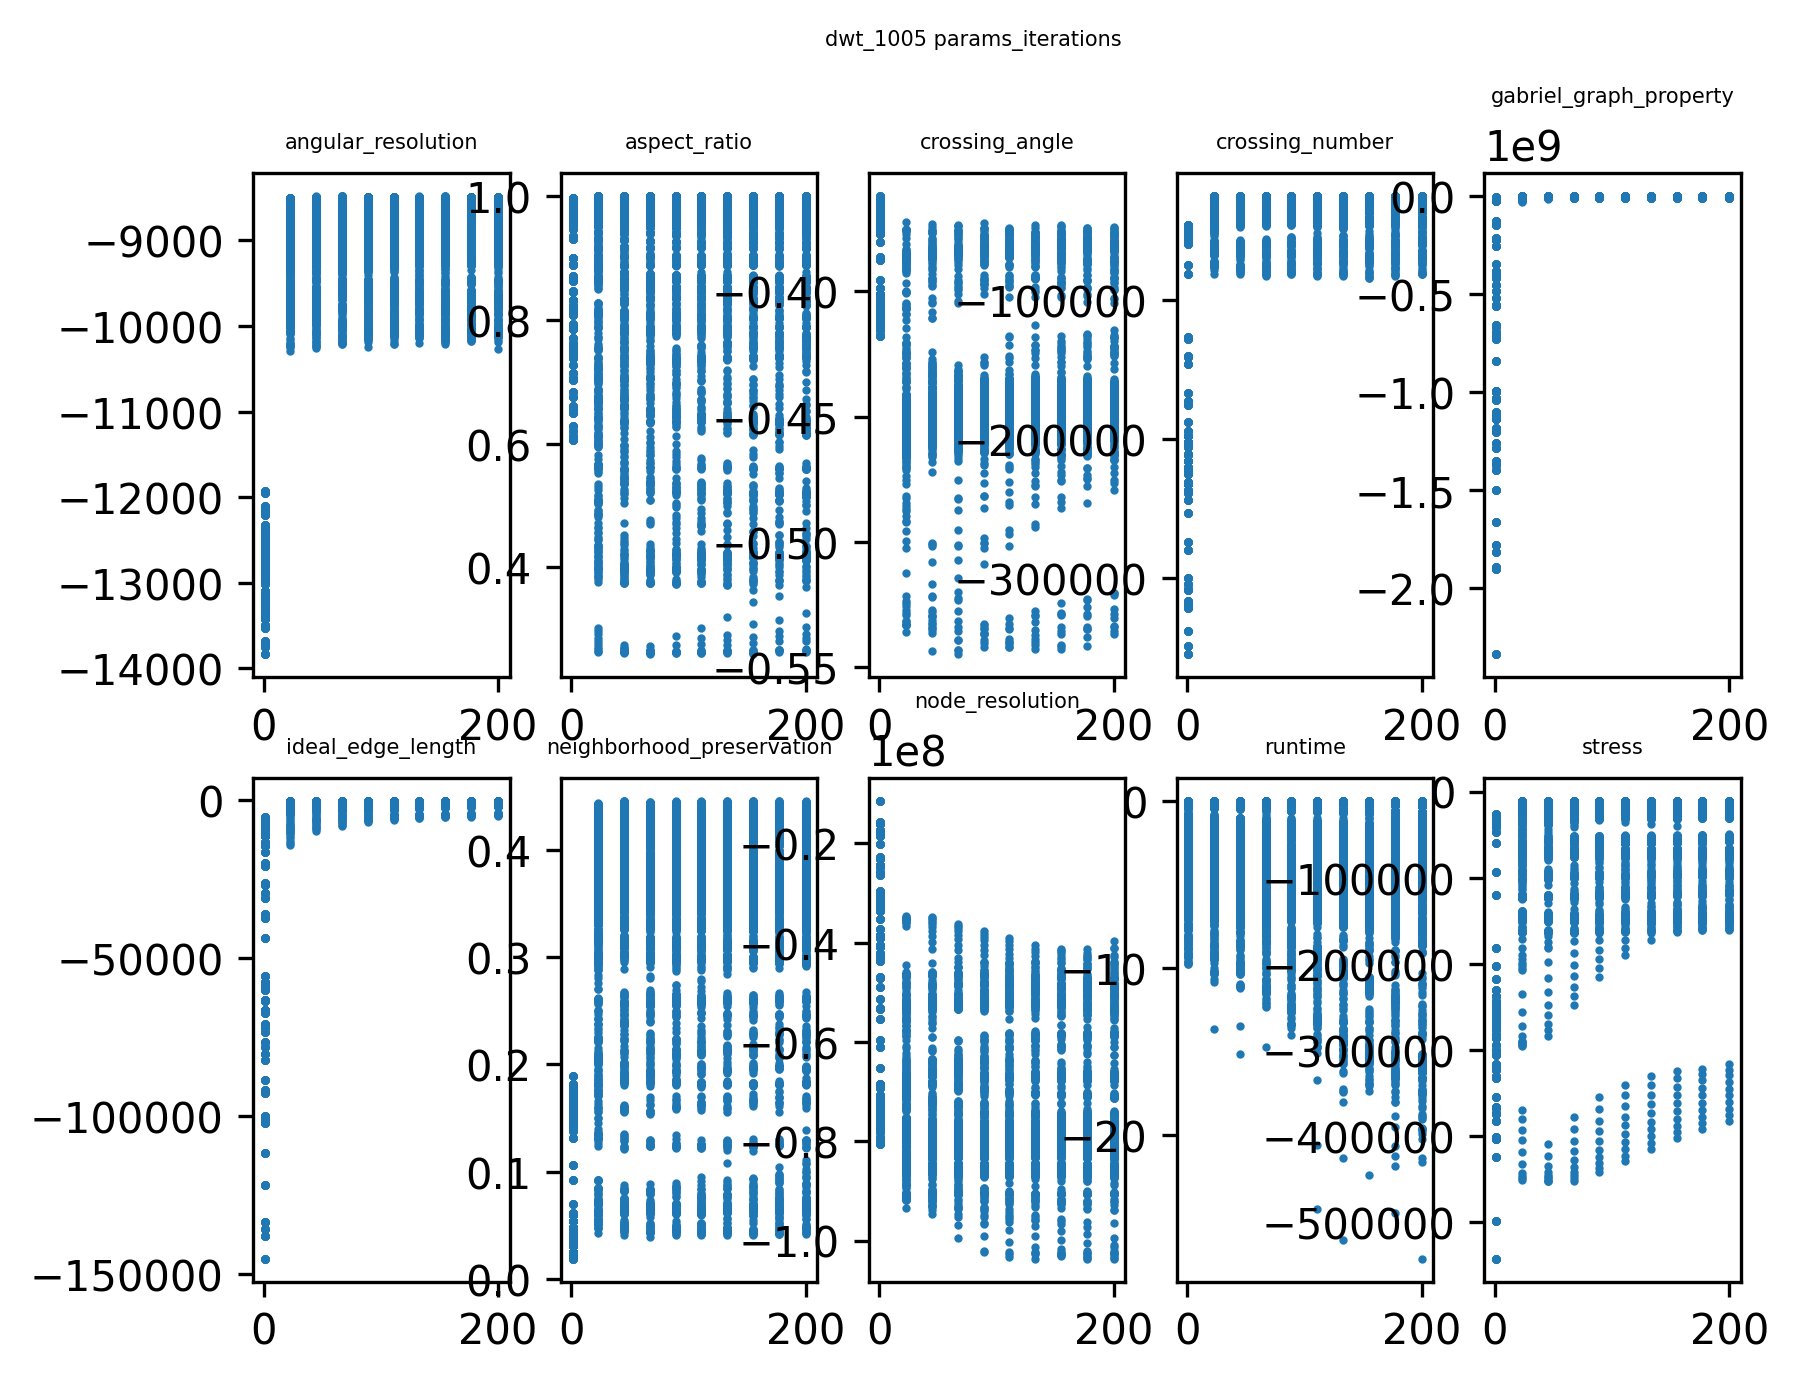

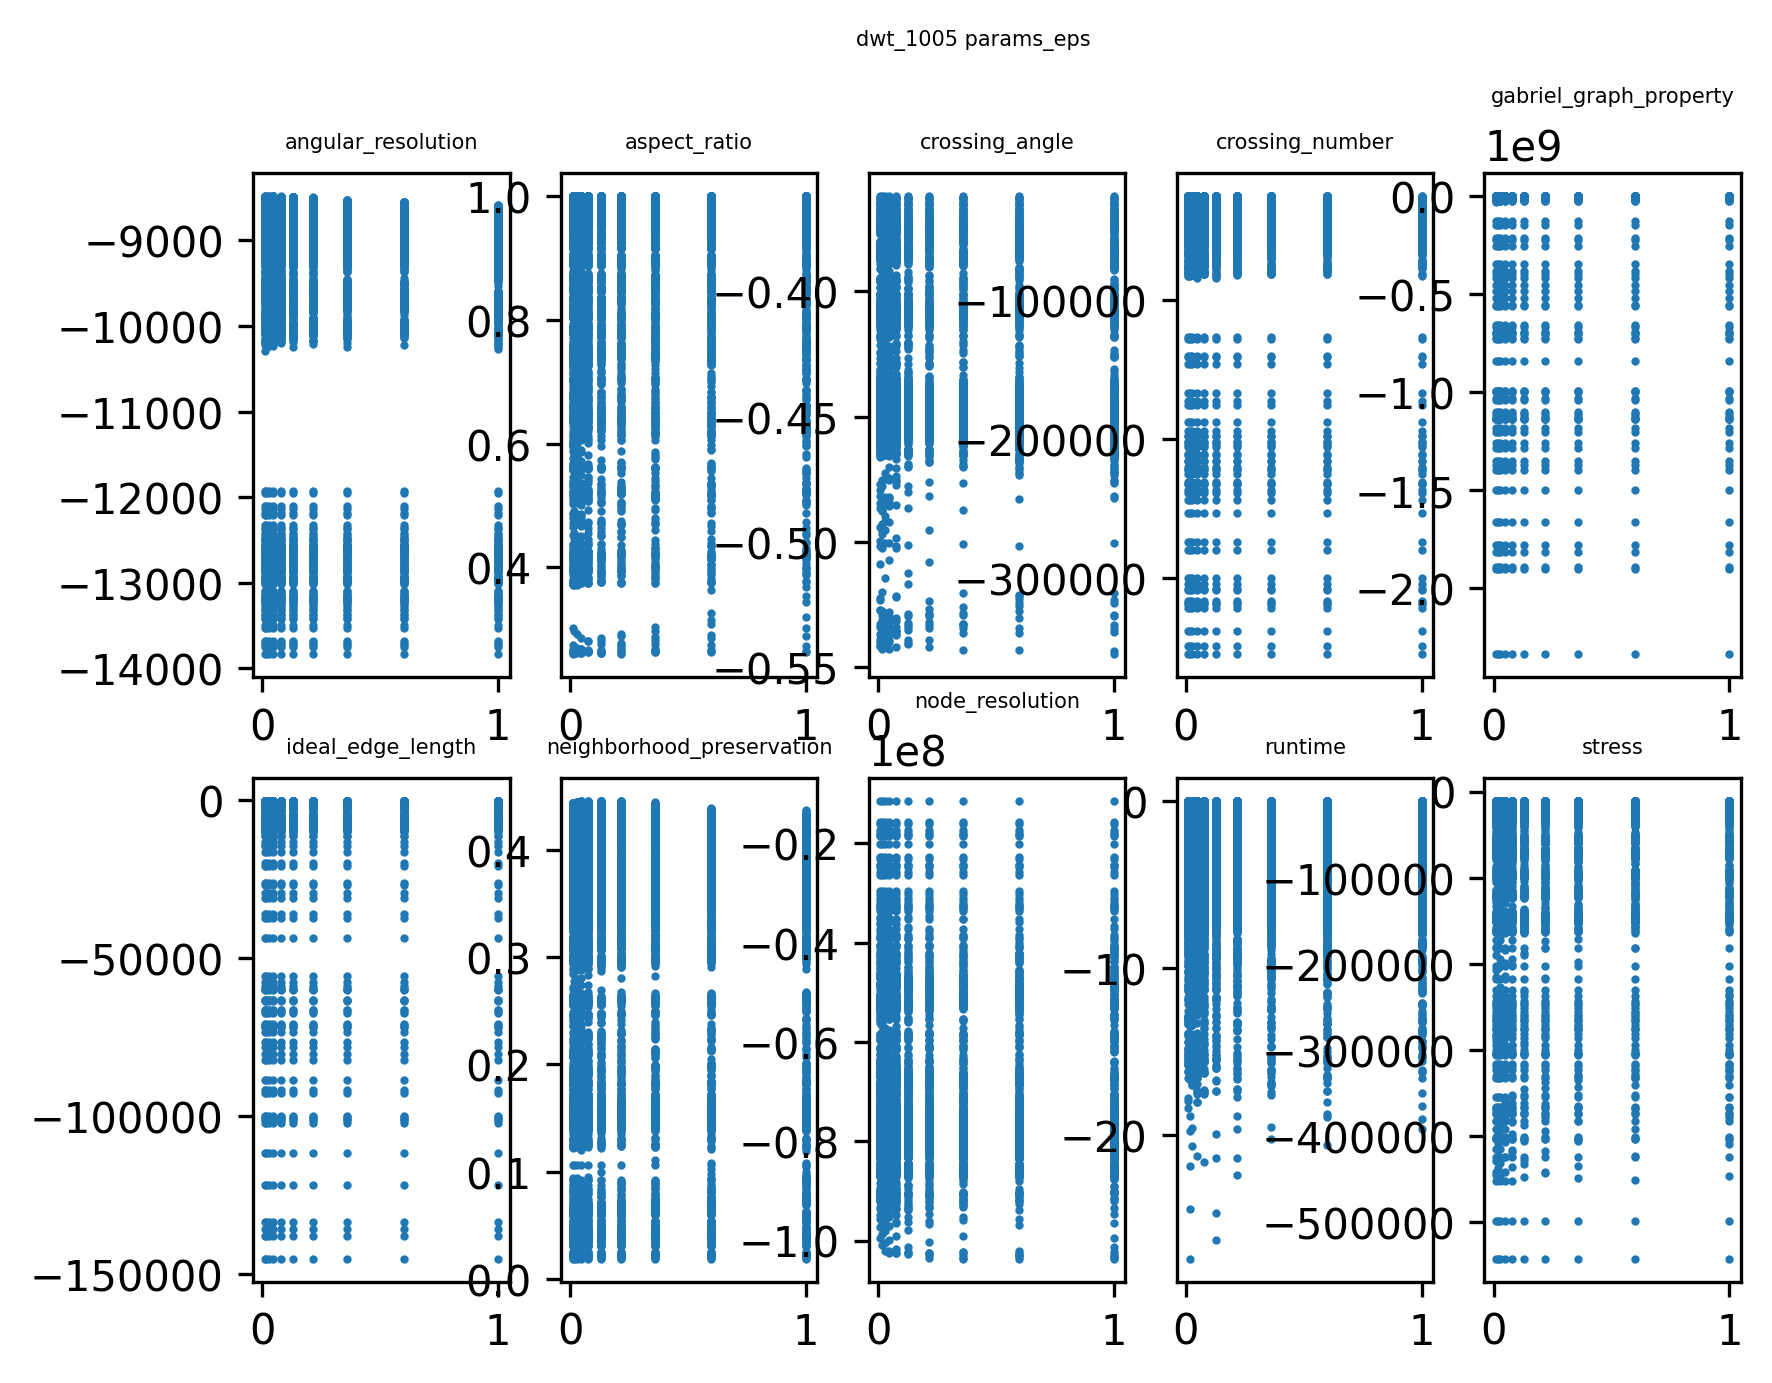

In [2]:
import pandas as pd
from ex_utils.share import ex_path, generate_sscalers, generate_mmscalers
from ex_utils.config.quality_metrics import qm_names, qm_name_abbreviations
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

n_bins = 50

p_names = ["params_pivots", "params_iterations", "params_eps"]

for D in ["les_miserables", "1138_bus", "USpowerGrid", "dwt_1005"]:
    seed = 1
    n_split = 10
    data_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    df_paths = [
        ex_path.joinpath(
            f"data/grid/percentage_pivots/{D}/seed={data_seed}_n={n_split}.pkl"
        )
        for data_seed in data_seeds
    ]
    # df = pd.read_pickle(
    #     ex_path.joinpath(
    #         f"data/grid/{D}/seed={','.join(map(str, data_seeds))}_n={n_split}.pkl"
    #     )
    # )
    df = pd.concat(
        [pd.read_pickle(df_path) for df_path in df_paths]
    ).reset_index()

    for p_name in p_names:
        fig, axes = plt.subplots(
            nrows=2, ncols=5, dpi=300, facecolor="white", squeeze=False
        )
        fig.suptitle(f'{D} {p_name}', fontsize=5)
        for qm_name, ax in zip(qm_names, axes.flatten()):
            ax.set_title(f"{qm_name}", fontsize=5)

            ax.scatter(df[p_name], df[f"values_{qm_name}"], s=1)
        fig.show()

    # # normal
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(D)
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(df[f"values_{qm_name}"], bins=n_bins)
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # display(df.describe())

In [3]:
display(df.describe())

index  params_pivots  params_iterations    params_eps  \
count  10000.000000   10000.000000       10000.000000  10000.000000   
mean     499.500000     188.000000         100.100000      0.248181   
std      288.689425     306.091113          63.350543      0.307423   
min        0.000000       1.000000           1.000000      0.010000   
25%      249.750000       5.000000          45.000000      0.027826   
50%      499.500000      34.500000         100.000000      0.103291   
75%      749.250000     217.000000         155.000000      0.359381   
max      999.000000    1006.000000         200.000000      1.000000   

       values_angular_resolution  values_aspect_ratio  values_crossing_number  \
count               10000.000000          9947.000000            10000.000000   
mean                -9324.340103             0.898265           -40005.710600   
std                  1239.925633             0.158889            44935.766738   
min                -13835.564453             0.259844          -355164.000000   
25%                 -9189.747803             0.864224           -29553.250000   
50%                 -8898.222168             0.978145           -26583.000000   
75%                 -8670.388916             0.993564           -25472.000000   
max                 -8479.225586             1.000000           -24565.000000   

       values_gabriel_graph_property  values_ideal_edge_length  \
count                   1.000000e+04              10000.000000   
mean                   -4.585363e+07              -4253.375840   
std                     2.299094e+08              16501.515293   
min                    -2.338413e+09            -145327.984375   
25%                    -6.109760e+05               -586.971222   
50%                    -3.047137e+05               -459.561707   
75%                    -2.421659e+05               -422.182472   
max                    -1.727543e+05               -195.074936   

       values_neighborhood_preservation  values_node_resolution  \
count                      10000.000000            1.000000e+04   
mean                           0.326275           -7.419076e+07   
std                            0.121076            1.261789e+07   
min                            0.018795           -1.037050e+08   
25%                            0.296561           -7.889956e+07   
50%                            0.369415           -7.785085e+07   
75%                            0.417853           -7.669331e+07   
max                            0.445436           -1.144140e+07   

       values_stress  values_crossing_angle  values_runtime          seed  \
count   10000.000000           10000.000000    10000.000000  10000.000000   
mean   -43948.553030              -0.441046       -4.142712      4.500000   
std     77205.707808               0.025854        3.251550      2.872425   
min   -543175.562500              -0.544701      -27.385467      0.000000   
25%    -29588.930664              -0.452567       -5.055722      2.000000   
50%    -12660.479004              -0.449254       -3.752410      4.500000   
75%    -11036.536621              -0.443939       -2.029978      7.000000   
max    -10706.377930              -0.362056       -0.006755      9.000000   

       edge_weight  
count      10000.0  
mean          30.0  
std            0.0  
min           30.0  
25%           30.0  
50%           30.0  
75%           30.0  
max           30.0

/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_31886/1903366640.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


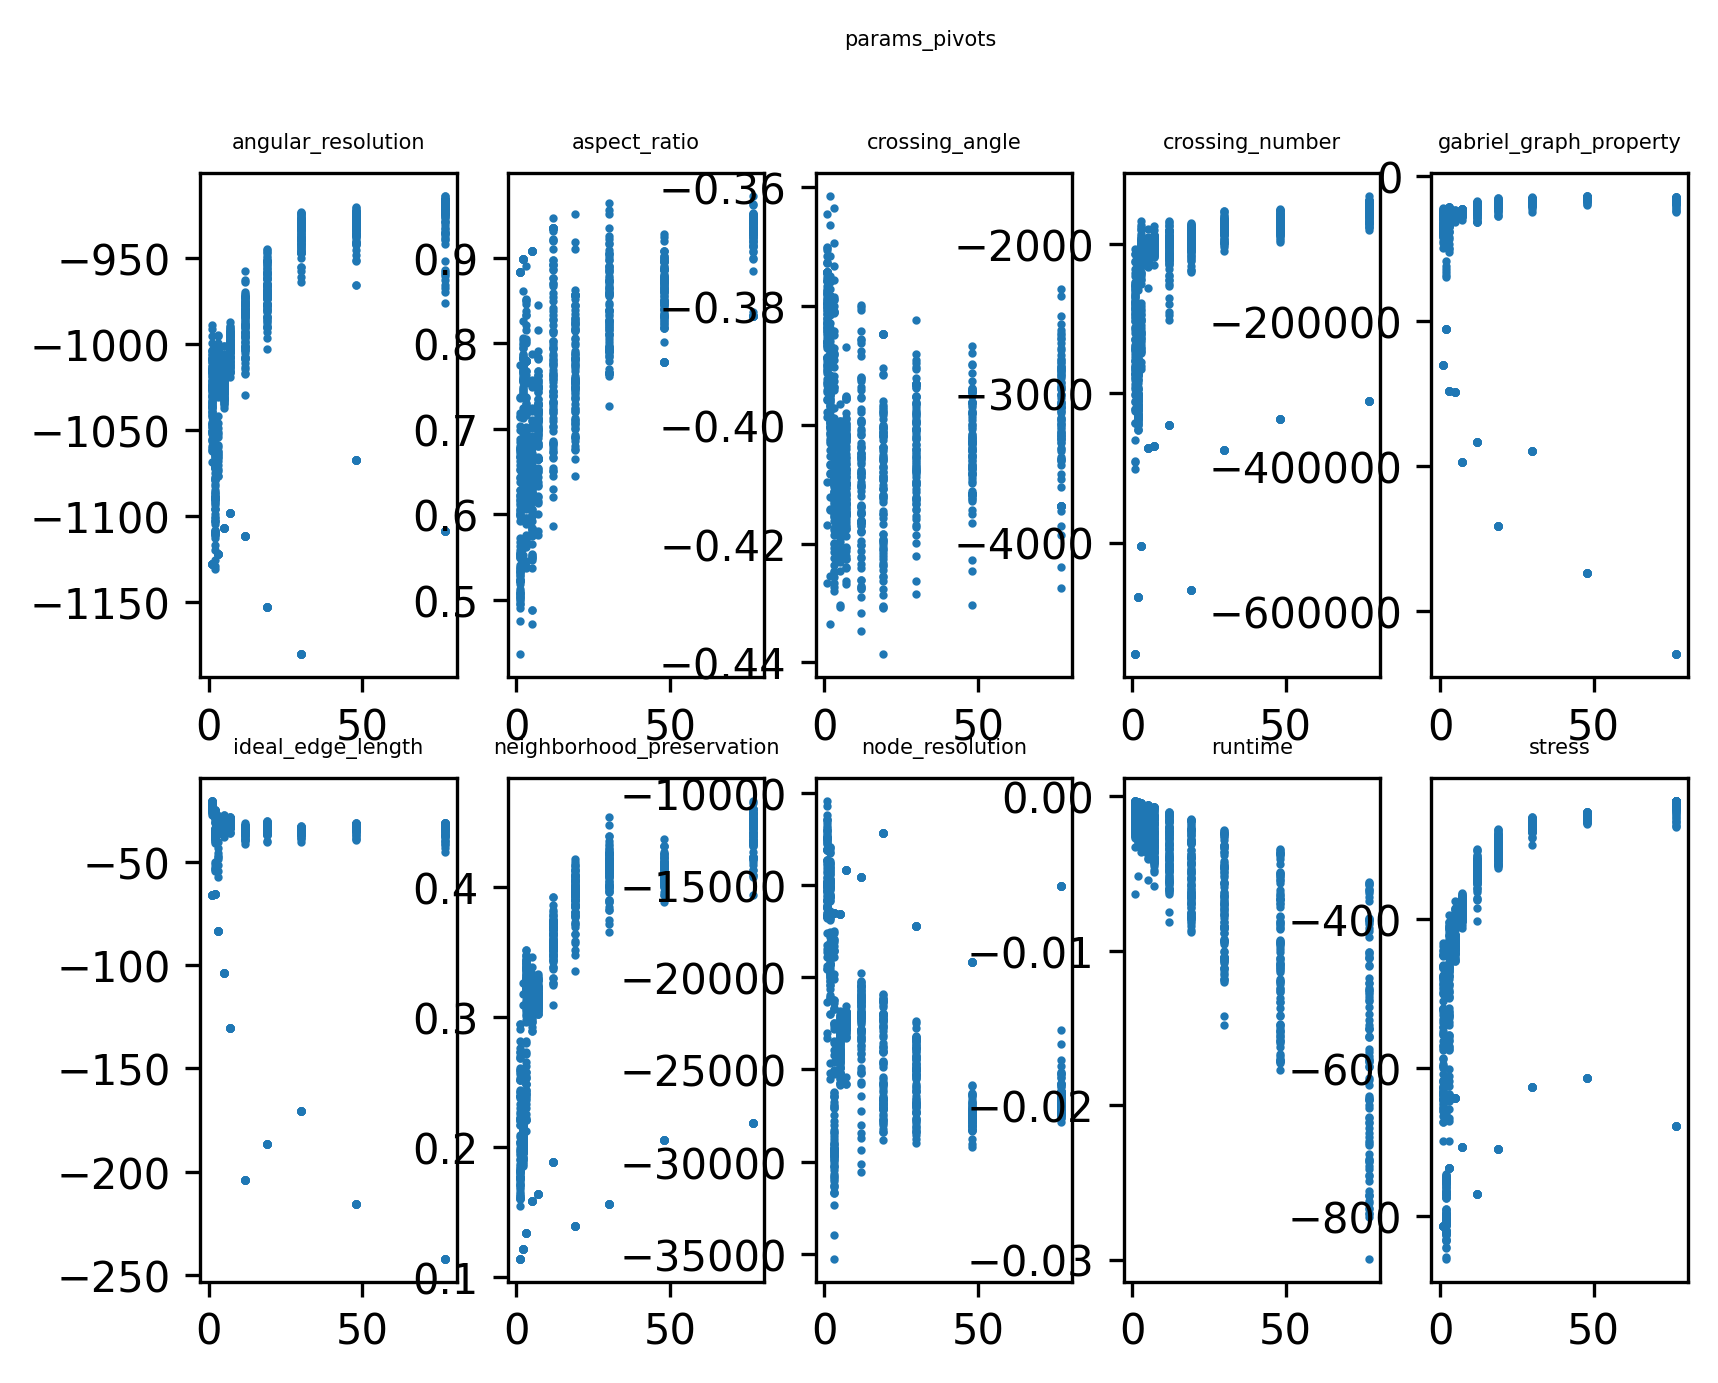

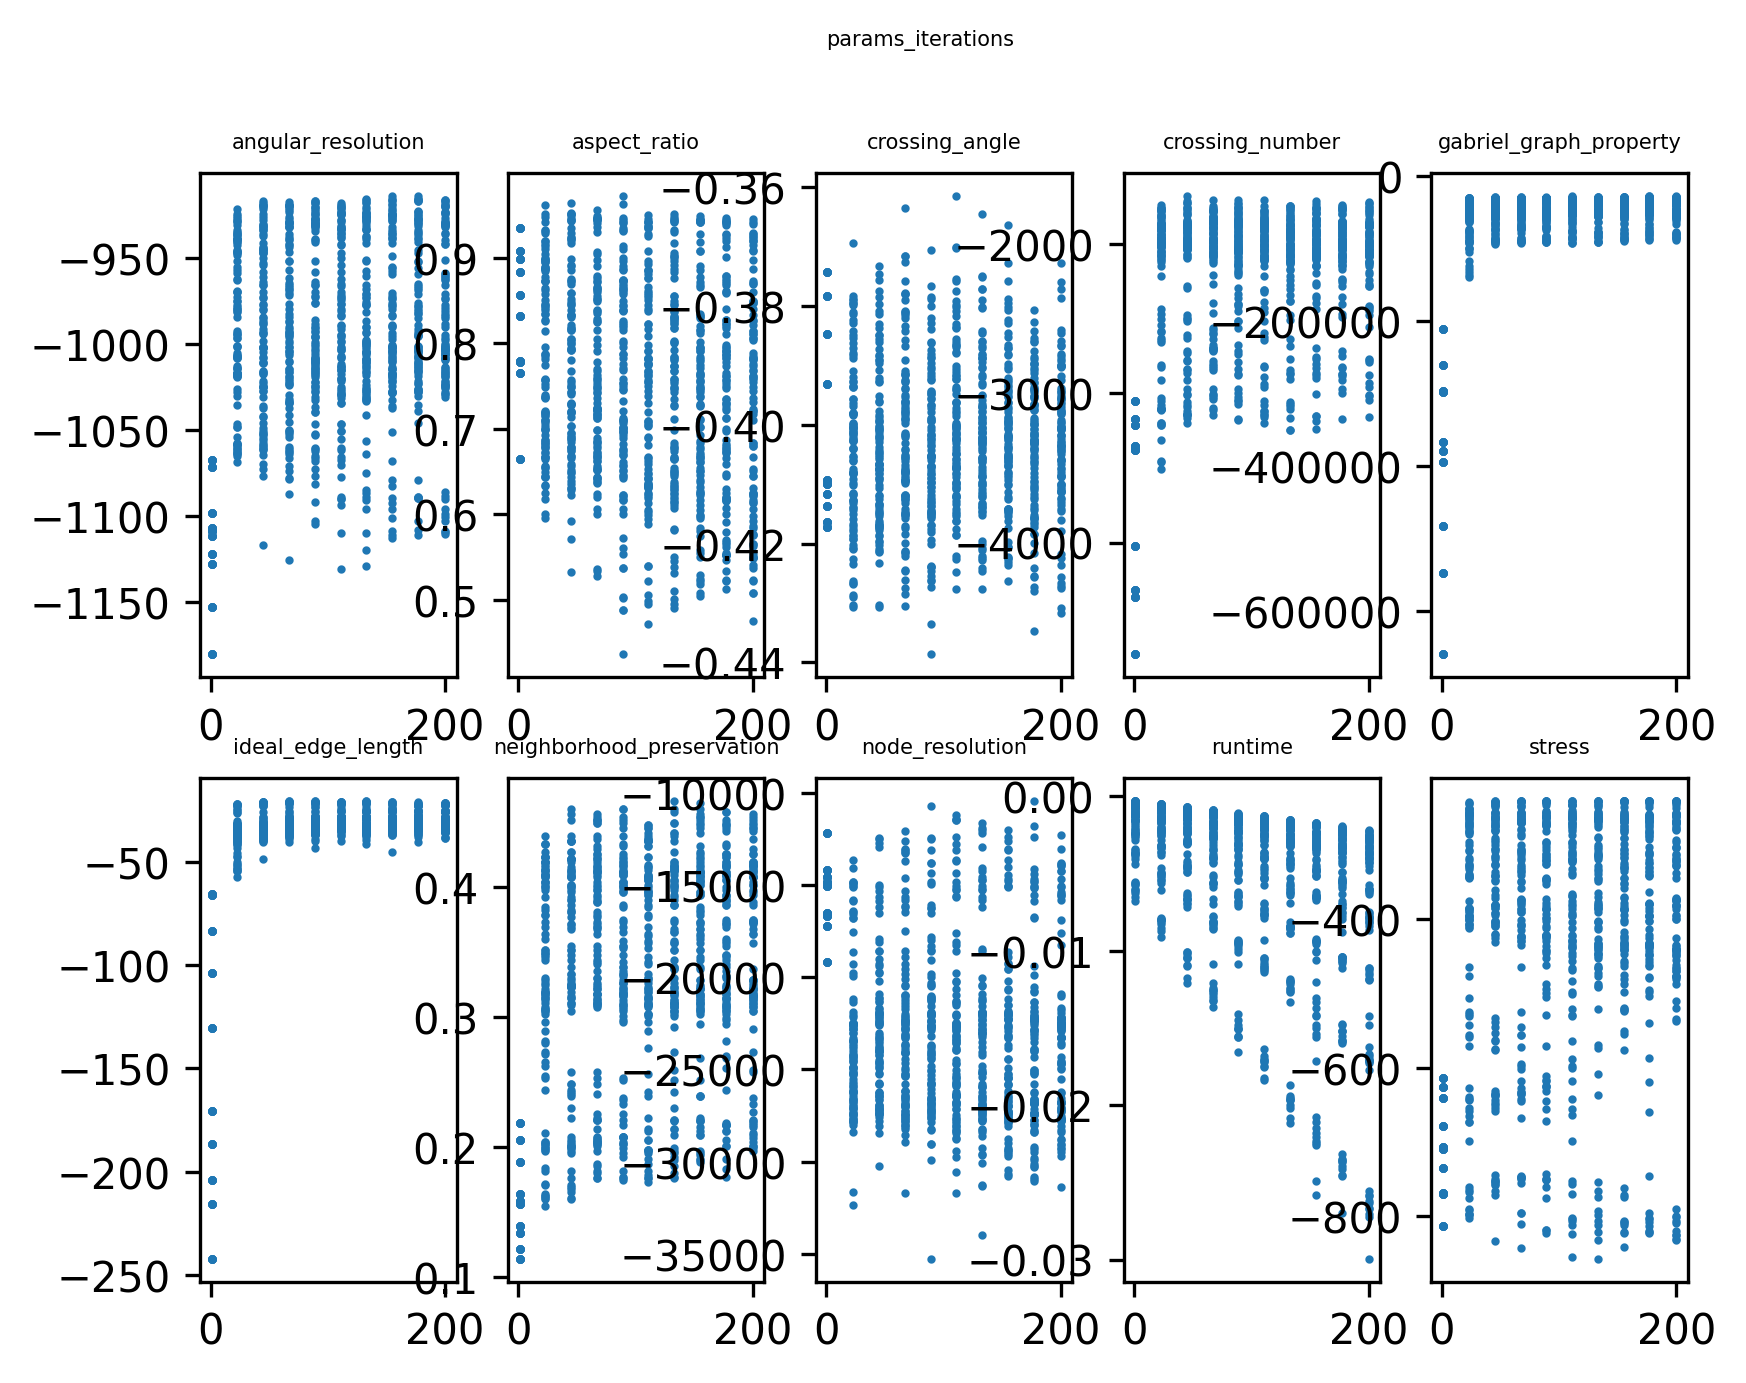

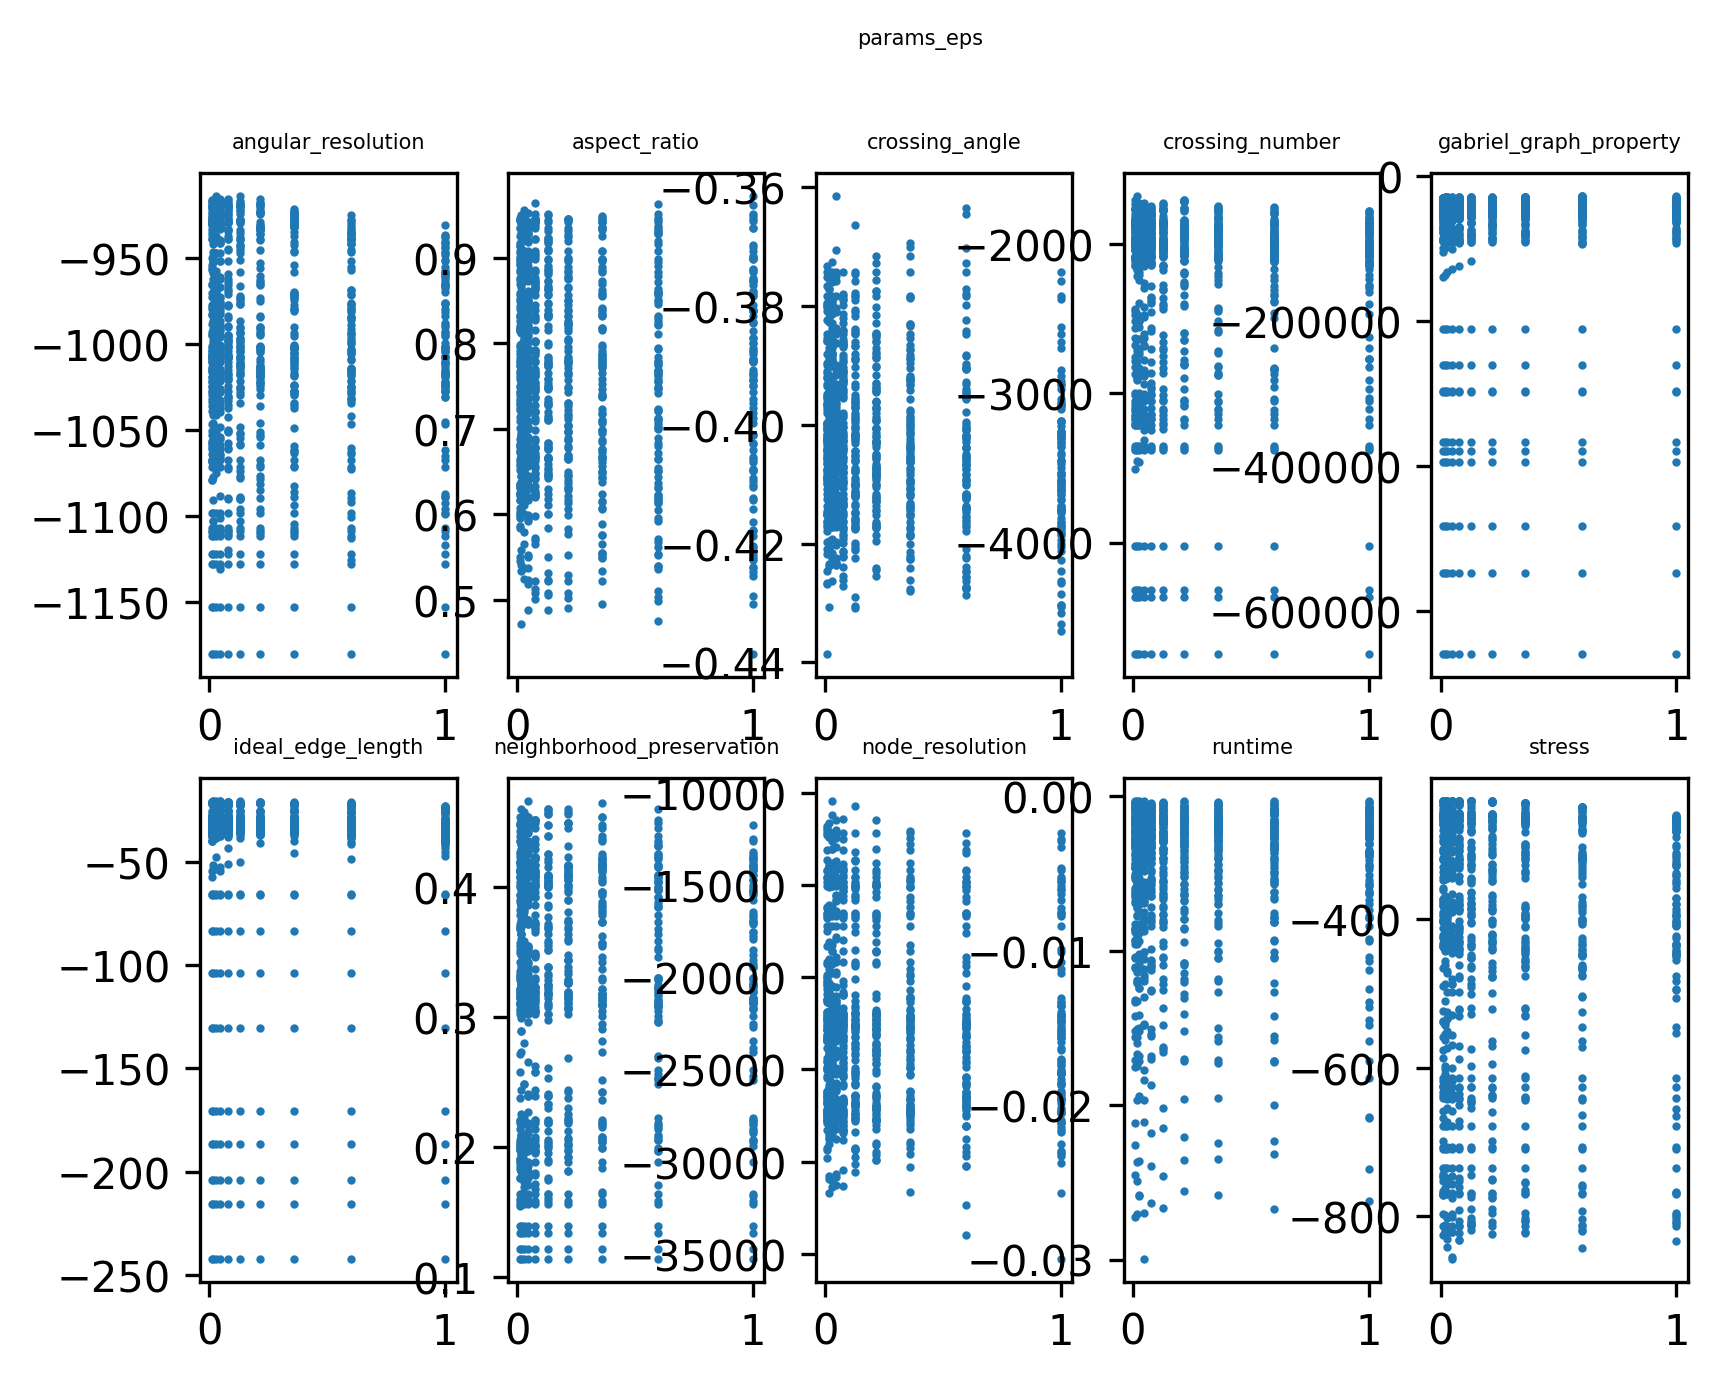

In [4]:
import pandas as pd
from ex_utils.share import ex_path, generate_sscalers, generate_mmscalers
from ex_utils.config.quality_metrics import qm_names, qm_name_abbreviations
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

n_bins = 50

p_names = ["params_pivots", "params_iterations", "params_eps"]

for D in [
    "les_miserables",
    # "1138_bus",
    #  "USpowerGrid", "dwt_1005"
]:
    seed = 1
    n_split = 10
    data_seeds = [
        # 0,
        1,
        # 2, 3, 4, 5, 6, 7, 8, 9
    ]
    df_paths = [
        ex_path.joinpath(
            f"data/grid/percentage_pivots/{D}/seed={data_seed}_n={n_split}.pkl"
        )
        for data_seed in data_seeds
    ]
    # df = pd.read_pickle(
    #     ex_path.joinpath(
    #         f"data/grid/{D}/seed={','.join(map(str, data_seeds))}_n={n_split}.pkl"
    #     )
    # )
    df = pd.concat(
        [pd.read_pickle(df_path) for df_path in df_paths]
    ).reset_index()

    for p_name in p_names:
        fig, axes = plt.subplots(
            nrows=2, ncols=5, dpi=300, facecolor="white", squeeze=False
        )
        fig.suptitle(p_name, fontsize=5)
        for qm_name, ax in zip(qm_names, axes.flatten()):
            ax.set_title(f"{qm_name}", fontsize=5)

            ax.scatter(df[p_name], df[f"values_{qm_name}"], s=1)
        fig.show()

    # # normal
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(D)
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(df[f"values_{qm_name}"], bins=n_bins)
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # display(df.describe())

In [5]:
display(df)
display(df.describe())

index  params_pivots  params_iterations  params_eps  \
0        0              1                  1    0.010000   
1        1              1                  1    0.016681   
2        2              1                  1    0.027826   
3        3              1                  1    0.046416   
4        4              1                  1    0.077426   
..     ...            ...                ...         ...   
995    995             77                200    0.129155   
996    996             77                200    0.215443   
997    997             77                200    0.359381   
998    998             77                200    0.599484   
999    999             77                200    1.000000   

     values_angular_resolution  values_aspect_ratio  values_crossing_number  \
0                 -1127.949585             0.882905                 -4747.0   
1                 -1127.949585             0.882905                 -4747.0   
2                 -1127.949585             0.882905                 -4747.0   
3                 -1127.949585             0.882905                 -4747.0   
4                 -1127.949585             0.882905                 -4747.0   
..                         ...                  ...                     ...   
995                -919.519287             0.920257                 -1777.0   
996                -917.642578             0.919921                 -1723.0   
997                -930.745178             0.945323                 -1775.0   
998                -941.511780             0.928630                 -1794.0   
999                -959.471863             0.914540                 -1860.0   

     values_gabriel_graph_property  values_ideal_edge_length  \
0                   -260713.875000                -65.871368   
1                   -260713.875000                -65.871368   
2                   -260713.875000                -65.871368   
3                   -260713.875000                -65.871368   
4                   -260713.875000                -65.871368   
..                             ...                       ...   
995                  -31138.787109                -31.873146   
996                  -30897.585938                -31.851744   
997                  -32329.103516                -33.197449   
998                  -35225.550781                -34.625050   
999                  -47984.812500                -37.787491   

     values_neighborhood_preservation  values_node_resolution  values_stress  \
0                            0.114035           -16671.289062    -812.439453   
1                            0.114035           -16671.289062    -812.439453   
2                            0.114035           -16671.289062    -812.439453   
3                            0.114035           -16671.289062    -812.439453   
4                            0.114035           -16671.289062    -812.439453   
..                                ...                     ...            ...   
995                          0.447293           -26837.154297    -241.649048   
996                          0.449358           -27209.634766    -241.802399   
997                          0.453505           -27125.525391    -243.824905   
998                          0.445235           -26754.345703    -250.263199   
999                          0.417015           -22882.689453    -269.254578   

     values_crossing_angle  values_runtime  seed  edge_weight  
0                -0.374258       -0.000345     1           30  
1                -0.374258       -0.000303     1           30  
2                -0.374258       -0.000304     1           30  
3                -0.374258       -0.000299     1           30  
4                -0.374258       -0.000603     1           30  
..                     ...             ...   ...          ...  
995              -0.394900       -0.026670     1           30  
996              -0.396134       -0.025543     1           30  
997              -0.405983   

index  params_pivots  params_iterations   params_eps  \
count  1000.000000    1000.000000        1000.000000  1000.000000   
mean    499.500000      20.400000         100.100000     0.248181   
std     288.819436      23.600784          63.379073     0.307562   
min       0.000000       1.000000           1.000000     0.010000   
25%     249.750000       3.000000          45.000000     0.027826   
50%     499.500000       9.500000         100.000000     0.103291   
75%     749.250000      30.000000         155.000000     0.359381   
max     999.000000      77.000000         200.000000     1.000000   

       values_angular_resolution  values_aspect_ratio  values_crossing_number  \
count                1000.000000          1000.000000             1000.000000   
mean                -1003.229951             0.758882            -2304.083000   
std                    61.169450             0.118310              624.784165   
min                 -1180.425781             0.436255            -4747.000000   
25%                 -1033.164001             0.666257            -2578.250000   
50%                 -1002.609039             0.765377            -2031.500000   
75%                  -946.788589             0.857066            -1904.750000   
max                  -913.749268             0.972501            -1680.000000   

       values_gabriel_graph_property  values_ideal_edge_length  \
count                    1000.000000               1000.000000   
mean                   -84397.491396                -43.177987   
std                    111406.119962                 40.028927   
min                   -659730.437500               -242.314865   
25%                    -67328.117188                -34.939374   
50%                    -49476.173828                -32.793680   
75%                    -36747.319336                -29.851685   
max                    -28092.931641                -20.220676   

       values_neighborhood_preservation  values_node_resolution  \
count                       1000.000000             1000.000000   
mean                           0.318795           -22437.758952   
std                            0.093931             4916.976275   
min                            0.114035           -35262.812500   
25%                            0.222623           -26611.029785   
50%                            0.326371           -22955.277344   
75%                            0.403315           -19196.189453   
max                            0.466089           -10440.492188   

       values_stress  values_crossing_angle  values_runtime    seed  \
count    1000.000000            1000.000000     1000.000000  1000.0   
mean     -437.664259              -0.402275       -0.005228     1.0   
std       180.814545               0.013239        0.005448     0.0   
min      -857.314514              -0.438591       -0.029961     1.0   
25%      -565.365097              -0.411836       -0.006630     1.0   
50%      -386.172012              -0.402984       -0.003049     1.0   
75%      -277.993103              -0.393521       -0.001717     1.0   
max      -240.708237              -0.361429       -0.000299     1.0   

       edge_weight  
count       1000.0  
mean          30.0  
std            0.0  
min           30.0  
25%           30.0  
50%           30.0  
75%           30.0  
max           30.0